In [1]:
"""
Purpose: To run the soma splitting 
on the processed neurons

"""


'\nPurpose: To run the soma splitting \non the processed neurons\n\n'

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2021-01-09 17:31:04,083 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-09 17:31:04,085 - settings - Setting database.user to celiib
INFO - 2021-01-09 17:31:04,086 - settings - Setting database.password to newceliipass
INFO - 2021-01-09 17:31:04,090 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-09 17:31:04,091 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-09 17:31:04,101 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-09 17:31:04,347 - settings - Setting enable_python_native_blobs to True


In [3]:
test_mode = True

In [4]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 200)
print(f"Sleeping {random_sleep_sec} sec before conneting")
if not test_mode:
    time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-09 17:31:04,381 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-09 17:31:04,382 - settings - Setting database.user to celiib
INFO - 2021-01-09 17:31:04,383 - settings - Setting database.password to newceliipass
INFO - 2021-01-09 17:31:04,384 - settings - Setting enable_python_native_blobs to True


Sleeping 142 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-09 17:31:04,639 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [5]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [6]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 8771


In [7]:
#so that it will have the adapter defined
from datajoint_utils import *

In [8]:
key_source = minnie.Decomposition()
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,decomposition,n_vertices number of vertices,n_faces number of faces,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134947393276,0,0.25,29.00,=BLOB=,1400375,2824255,0,0,0,1,8,427,292,10485954.599357573,4727993.083156605,13445.294,87.88,87.88,580.726,553.126,2350,0.0002241093052361655,5.503512880562061,4549944.99,150,0.0005164897609014828,15.667,86456604345.94843,20733767.594250996,8244.991290658958,19001.6812370183,576377362.3063228,6052.7497
864691135012398582,0,0.25,29.00,=BLOB=,1376990,2794781,4,1,4,2,8,330,131,13929332.12258168,4744489.087608502,25208.79,181.248,177.914,503.855,470.905,5197,0.00037309757239364195,15.748484848484848,8746791.671,174,0.0005941607157777246,29.868,251421367265.7805,24448738.045176186,18049.7790599871,28744.410147479375,1444950386.5849454,5996.9728
864691135012471798,0,0.25,29.00,=BLOB=,879119,1793791,2,1,2,2,8,287,83,10504921.973170185,3098908.649973214,20600.38,101.514,101.514,460.035,401.749,2708,0.00025778392328056266,9.435540069686411,6126023.074,125,0.00044204861249923526,21.664,133822127394.86624,32030964.53258705,12738.99299172817,21844.8617934256,1070577019.15893,10541.8198
864691135012571126,0,0.25,29.00,=BLOB=,1405952,2834699,4,4,0,1,8,434,190,14952565.529701162,5950582.376110614,22558.465,138.374,138.374,462.864,403.433,5410,0.000361810820307311,12.465437788018432,8599310.865,213,0.0006291201800855004,25.399,343080427437.90247,35381025.859495796,22944.586115099886,39896.26992486943,1610706232.1028285,18348.506
864691135012905110,0,0.25,29.00,=BLOB=,816541,1676641,1,1,0,1,9,266,119,10125935.219943585,4352752.241138446,24325.062,90.366,90.366,387.869,355.32,2433,0.00024027410280169214,9.146616541353383,5469864.913,104,0.0004448007471295297,23.394,145698898455.88928,31207278.626825333,14388.6856168038,26636.65387962558,1400950946.6912432,11106.3706
864691135065018692,0,0.25,29.00,=BLOB=,927599,1896021,1,1,1,2,18,276,61,10166672.817443343,2066816.1113789165,17200.227,109.19,109.19,532.523,523.56,2023,0.00019898348617347682,7.329710144927536,5487593.34,122,0.000368649765873504,16.582,124429383137.71652,33444570.407502748,12238.948313968396,22674.67274419364,1019912976.53866,4207.7487
864691135065024068,0,0.25,29.00,=BLOB=,1683573,3378174,2,2,0,1,11,336,99,15436829.265081966,4735182.057076573,30246.518,312.805,283.607,621

In [9]:
import numpy as np
import time
import proofreading_utils as pru

@schema
class NeuronSplitSuggestions(dj.Computed):
    definition="""
    -> minnie.Decomposition
    ---
    split_results: longblob #will store the results of how to split the limbs of neuron objects
    run_time=NULL : double                   # the amount of time to run (seconds)

    """

    key_source = minnie.Decomposition()
    
    def make(self,key):
        """
        Pseudocode for process:

        1) Fetch the neuron object
        2) Run the mutli-split suggestions
        3) Calculate the total time
        4) Write the results to the table
        """
        whole_pass_time = time.time()
        #1) Get the segment id from the key
        segment_id = key["segment_id"]
        print(f"\n\n----- Working on {segment_id}-------")
        
        neuron_obj = (minnie.Decomposition & key).fetch1("decomposition")
        
        limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)
        
        #7) Pass stats and file location to insert
        new_key = dict(key,
                       split_results = limb_results,
                       run_time=np.round(time.time() - whole_pass_time,4)
                      )

        self.insert1(new_key, allow_direct_insert=True, skip_duplicates=True)

        print(f"\n\n ------ Total time for Splitting {segment_id} = {time.time() - whole_pass_time} ------")
    

# Running the Populate

In [10]:
curr_table = (minnie.schema.jobs & "table_name='__neuron_split_suggestions'")
(curr_table)# & "status='error'")
#curr_table.delete()
#(curr_table & "error_message = 'ValueError: need at least one array to concatenate'").delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__neuron_split_suggestions,502a39f8507e8566285266a8332bb817,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,20388,26929,2021-01-09 11:30:56


INFO - 2021-01-09 17:31:04,777 - autopopulate - Found 88 keys to populate
INFO - 2021-01-09 17:31:04,787 - connection - Transaction started
INFO - 2021-01-09 17:31:04,788 - autopopulate - Populating: {'segment_id': 864691135081745143, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25'), 'ver': Decimal('29.00')}


Populate Started


----- Working on 864691135081745143-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = [1]
multi_touch_limbs = [1]


 -------- Working on limb 1------------
Starting combinations to process = [[ 0  2]
 [ 0 29]
 [ 2 29]]


---- working on disconnecting 0 and 2
---- This disconnects S0_1 from S0_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [0, 3, 5, 2]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [1 3 4 5 7]
Short segments to combine = []
Found 0 high degree coordinates to cut
Skipping endnode 0 because skeletal distance was 995.2461347002678 and threshold was 2500
skip_nodes = [0]

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [3 5]: curr_angle = 156.41
  Edge: [5 2]: curr_angle = 26.27

Total time for doubling_back = 0.1264359951019287
There were 1 edges that passed doubling back threshold of 100
Winning edge [3 5] had a doubling back of 156.41148329520541
***inside resolve crossover!!!!****
coordinate_branches = [3, 5, 7]
3 = red
5 = aqua
7 = purple
Angle between 3 and 5 = 131.08 
Angle between 3 and 7 = 10.36 
Angle between 5 and 7 = 40.2 
Final Matches = [[3, 7]]
matched_branches_revised = [[3, 7]]
Original graph


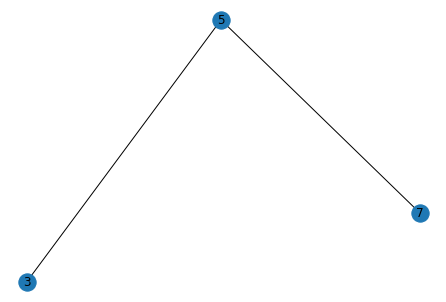

match_branches = [[3, 7]]
edges_to_delete (resolve crossover) = [[3, 5], [5, 7]]
edges_to_create (resolve crossover) = [[3, 7]]
edges_to_delete (cut_limb_network) = [array([3, 5]), array([5, 7])]
edges_to_create = [[3, 7]]
Number of connected components = 2
Comp 0 = {2, 4, 5}
Comp 1 = {0, 1, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30}
curr_limb_copy.deleted_edges = [array([3, 5]), array([5, 7])]
curr_limb_copy.created_edges = [[3, 7]]
After get best cut: cut_edges = [array([3, 5]), array([5, 7])], added_edges = [[3, 7]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection


---- working on disconnecting 0 and 29
---- This disconnects S0_1 from S1_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE

  Edge: [3 1]: curr_angle = 142.04
  Edge: [ 1 28]: curr_angle = 44.69
  Edge: [28 29]: curr_angle = 22.36

Total time for doubling_back = 0.5154025554656982
There were 1 edges that passed doubling back threshold of 100
Winning edge [3 1] had a doubling back of 142.03830471044134
***inside resolve crossover!!!!****
coordinate_branches = [0, 1, 3]
0 = red
1 = aqua
3 = purple
Angle between 0 and 1 = 28.51 
Angle between 0 and 3 = 34.33 
Angle between 1 and 3 = 117.36 
Final Matches = [[0, 1], [0, 3]]
matched_branches_revised = [[0, 1]]
Original graph


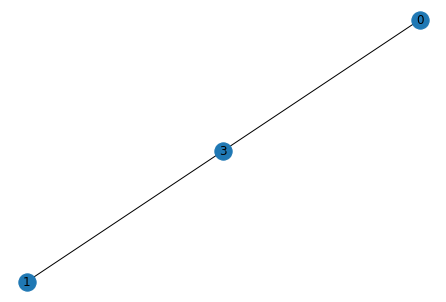

match_branches = [[0, 1]]
edges_to_delete (resolve crossover) = [[0, 3], [1, 3]]
edges_to_create (resolve crossover) = [[0, 1]]
edges_to_delete (cut_limb_network) = [array([0, 3]), array([1, 3])]
edges_to_create = [[0, 1]]
Number of connected components = 3
Comp 0 = {2, 4, 5}
Comp 1 = {8, 9, 3, 7}
Comp 2 = {0, 1, 6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30}
curr_limb_copy.deleted_edges = [array([3, 5]), array([5, 7]), array([0, 3]), array([1, 3])]
curr_limb_copy.created_edges = [[3, 7], [0, 1]]
After get best cut: cut_edges = [array([0, 3]), array([1, 3])], added_edges = [[0, 1]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
Shortest path = [0, 1, 28, 29]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[array([3, 5]), array([5, 7]), array([0, 3]), arra

  Edge: [ 1 28]: curr_angle = 44.69
  Edge: [28 29]: curr_angle = 22.36

Total time for doubling_back = 0.2951805591583252

Attempting the width jump check (attempting from both sides)
  Edge: [ 1 28]: jump = 354.88
Adding error edge [ 1 28] because width jump was 354.88307361416935
  Edge: [28 29]: jump = 104.16
Total time for width = 0.26676130294799805
Path starting at 0 had err_edges: [[1, 28]]
  Edge: [29 28]: jump = -104.16
  Edge: [28  1]: jump = -354.88
Total time for width = 0.2679014205932617
Path starting at 29 had err_edges: []
first_error_sizes = [354.88307361416935, -inf], winning_path = 0
***inside resolve crossover!!!!****
coordinate_branches = [1, 26, 28]
1 = red
26 = aqua
28 = purple
Angle between 1 and 26 = 110.45 
Angle between 1 and 28 = 55.07 
Angle between 26 and 28 = 15.31 
Final Matches = [[26, 28]]
matched_branches_revised = [[26, 28]]
Original graph


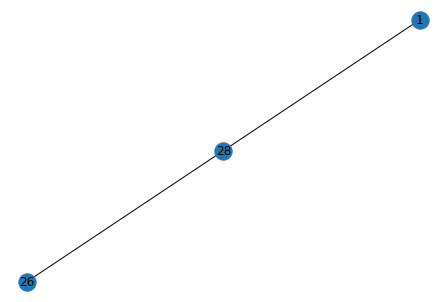

match_branches = [[26, 28]]
edges_to_delete (resolve crossover) = [[1, 26], [1, 28]]
edges_to_create (resolve crossover) = [[26, 28]]
edges_to_delete (cut_limb_network) = [array([ 1, 26]), array([ 1, 28])]
edges_to_create = [[26, 28]]
Number of connected components = 4
Comp 0 = {2, 4, 5}
Comp 1 = {8, 9, 3, 7}
Comp 2 = {0, 1}
Comp 3 = {6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30}
curr_limb_copy.deleted_edges = [array([3, 5]), array([5, 7]), array([0, 3]), array([1, 3]), array([ 1, 26]), array([ 1, 28])]
curr_limb_copy.created_edges = [[3, 7], [0, 1], [26, 28]]
After get best cut: cut_edges = [array([ 1, 26]), array([ 1, 28])], added_edges = [[26, 28]]
total_soma_paths_to_cut = [array([0, 3]), array([1, 3])]
-----------counter = 1------------
 Cut iteration 2
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so moving onto the next connection




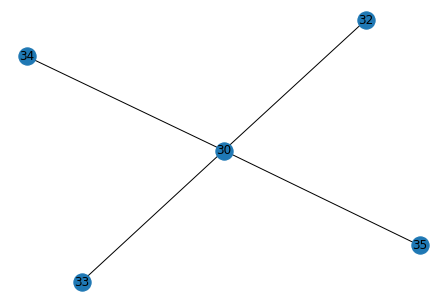

match_branches = []
edges_to_delete (resolve crossover) = [[30, 32], [30, 33], [30, 34], [30, 35], [32, 33], [32, 34], [32, 35], [33, 34], [33, 35], [34, 35]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[30, 32], [30, 33], [30, 34], [30, 35], [32, 33], [32, 34], [32, 35], [33, 34], [33, 35], [34, 35]]
edges_to_create = []
Number of connected components = 5
Comp 0 = {26, 27, 28, 29, 31, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30}
Comp 2 = {32}
Comp 3 = {33}
Comp 4 = {34}
curr_limb_copy.deleted_edges = [[30, 32], [30, 33], [30, 34], [30, 35], [32, 33], [32, 34], [32, 35], [33, 34], [33, 35], [34, 35]]
curr

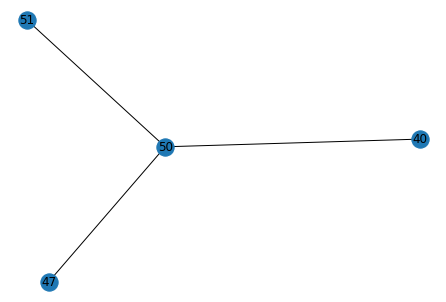

match_branches = [[47, 50], [40, 51]]
edges_to_delete (resolve crossover) = [[40, 47], [40, 50], [47, 51], [50, 51]]
edges_to_create (resolve crossover) = [[47, 50], [40, 51]]
curr_limb.deleted_edges 5 =[[30, 32], [30, 33], [30, 34], [30, 35], [32, 33], [32, 34], [32, 35], [33, 34], [33, 35], [34, 35]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[40, 47], [40, 50], [47, 51], [50, 51]]
edges_to_create = [[47, 50], [40, 51]]
Number of connected components = 7
Comp 0 = {26, 27, 28, 29, 31, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95}
Comp 1 = {40, 51}
Comp 2 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30}
Comp 3 = {32}
Comp 4 = {33}
Comp 5 = {34}
Comp 6 = {72}
curr_limb_copy.deleted_edges = [[30, 32], [30, 33], [30, 34], [30, 35], [32, 33], [3

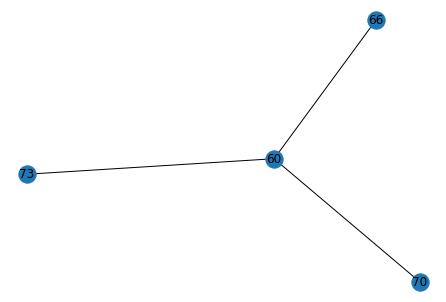

match_branches = [[70, 73]]
edges_to_delete (resolve crossover) = [[60, 66], [60, 70], [60, 73], [66, 70], [66, 73]]
edges_to_create (resolve crossover) = [[70, 73]]
curr_limb.deleted_edges 5 =[[30, 32], [30, 33], [30, 34], [30, 35], [32, 33], [32, 34], [32, 35], [33, 34], [33, 35], [34, 35], [40, 47], [40, 50], [47, 51], [50, 51]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[60, 66], [60, 70], [60, 73], [66, 70], [66, 73]]
edges_to_create = [[70, 73]]
Number of connected components = 9
Comp 0 = {26, 27, 28, 29, 31, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 56, 57, 59, 60}
Comp 1 = {40, 51}
Comp 2 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30}
Comp 3 = {32}
Comp 4 = {33}
Comp 5 = {34}
Comp 6 = {64, 66, 63}
Comp 7 = {39, 55, 58, 61, 62, 65, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95}
Comp 8 = {72}
curr_limb_copy.deleted_edges = [[3

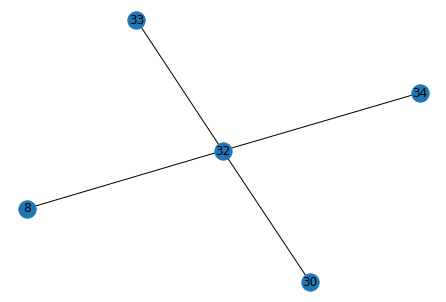

match_branches = [[30, 34], [8, 32]]
edges_to_delete (resolve crossover) = [[8, 30], [8, 33], [8, 34], [30, 32], [30, 33], [32, 33], [32, 34], [33, 34]]
edges_to_create (resolve crossover) = [[30, 34], [8, 32]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[8, 30], [8, 33], [8, 34], [30, 32], [30, 33], [32, 33], [32, 34], [33, 34]]
edges_to_create = [[30, 34], [8, 32]]
Number of connected components = 5
Comp 0 = {34, 30}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 32, 35, 36}
Comp 2 = {33}
Comp 3 = {31}
Comp 4 = {37}
curr_limb_copy.deleted_edges = [[8, 30], [8, 33], [8, 34], [30, 32], [30, 33], [32, 33], [32, 34], [33, 34]]
curr_limb_copy.created_edges = [[30, 34], [8, 32]]
After get best cut: cut_edges = [[8, 30], [8, 33], [8, 34], [30, 32], [30, 33], [32, 33], [32, 34], [33, 34]], added_edges = [[30, 34], [8, 32]]
total_soma_paths_to_cut = []
-----------counter = 0-------

  Edge: [0 5]: curr_angle = 56.85
  Edge: [5 3]: curr_angle = 114.98
  Edge: [3 1]: curr_angle = 84.41

Total time for doubling_back = 0.20107531547546387
There were 1 edges that passed doubling back threshold of 100
Winning edge [5 3] had a doubling back of 114.9765984819138
***inside resolve crossover!!!!****
coordinate_branches = [2, 3, 5]
2 = red
3 = aqua
5 = purple
Angle between 2 and 3 = 40.87 
Angle between 2 and 5 = 134.17 
Angle between 3 and 5 = 85.4 
Final Matches = []
matched_branches_revised = []
Original graph


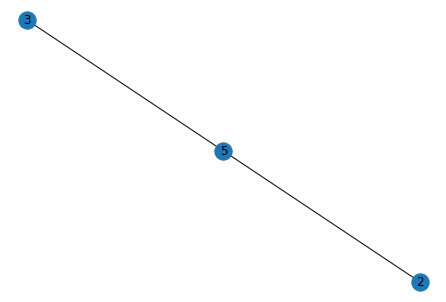

match_branches = []
edges_to_delete (resolve crossover) = [[2, 3], [2, 5], [3, 5]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([2, 3]), array([2, 5]), array([3, 5])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {0, 5, 6}
Comp 1 = {2}
Comp 2 = {1, 3, 4}
curr_limb_copy.deleted_edges = [array([2, 3]), array([2, 5]), array([3, 5])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([2, 3]), array([2, 5]), array([3, 5])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([0, 5, 6]), array([2]), array([1, 3, 4])]


 ------ Total time for Splitting 864691135775809197 = 113.0428352355957 ------


----- Working on 864691135

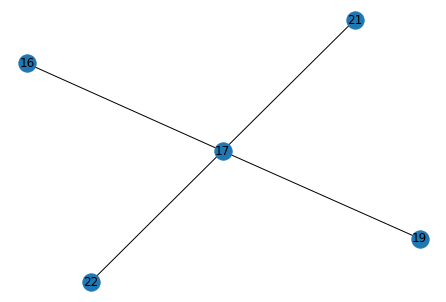

match_branches = [[17, 19], [16, 21]]
edges_to_delete (resolve crossover) = [[16, 17], [16, 19], [16, 22], [17, 21], [17, 22], [19, 21], [19, 22], [21, 22]]
edges_to_create (resolve crossover) = [[17, 19], [16, 21]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[16, 17], [16, 19], [16, 22], [17, 21], [17, 22], [19, 21], [19, 22], [21, 22]]
edges_to_create = [[17, 19], [16, 21]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 133, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 135, 144, 17, 147, 148, 19, 146, 20, 145, 18, 149, 150, 151, 23, 30, 31, 28, 5, 27, 33, 36, 37, 34, 40, 42, 45, 46, 47, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 76, 79, 88, 92, 93.0, 94, 95, 96, 98, 99, 100, 101, 102, 104, 105, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 126, 127}
Comp 1 = {128, 129, 130, 131, 132, 134, 136, 137, 138, 139, 140, 141, 142, 143, 16, 21, 152, 153, 154, 155, 26, 29, 157, 159, 32, 158, 25, 156, 160, 161, 38, 39, 35, 41, 43, 44, 48, 49, 50

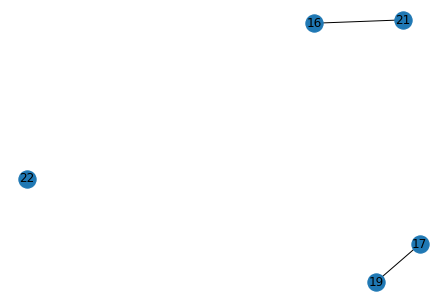

match_branches = [[17, 19], [16, 21]]
edges_to_delete (resolve crossover) = [[16, 17], [16, 19], [16, 22], [17, 21], [17, 22], [19, 21], [19, 22], [21, 22]]
edges_to_create (resolve crossover) = [[17, 19], [16, 21]]
curr_limb.deleted_edges 5 =[[16, 17], [16, 19], [16, 22], [17, 21], [17, 22], [19, 21], [19, 22], [21, 22]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[16, 17], [16, 19], [16, 22], [17, 21], [17, 22], [19, 21], [19, 22], [21, 22]]
edges_to_create = [[17, 19], [16, 21]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 133, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 135, 144, 17, 147, 148, 19, 146, 20, 145, 18, 149, 150, 151, 23, 30, 31, 28, 5, 27, 33, 36, 37, 34, 40, 42, 45, 46, 47, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 76, 79, 88, 92, 93.0, 94, 95, 96, 98, 99, 100, 101, 102, 104, 105, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 126, 127}
Comp 1 = {128, 129, 130, 131, 132, 134, 136, 137, 138, 139, 140, 141, 142, 143, 16, 21, 152, 153, 154, 155, 26

  Edge: [18 17]: curr_angle = 22.39
  Edge: [17 19]: curr_angle = 6.41
  Edge: [19 20]: curr_angle = 34.79
  Edge: [20 23]: curr_angle = 30.15
  Edge: [23 28]: curr_angle = 17.3
  Edge: [28 40]: curr_angle = 39.43
  Edge: [40 63]: curr_angle = 41.03
  Edge: [63 62]: curr_angle = 26.46
  Edge: [62 64]: curr_angle = 47.3
  Edge: [64 98]: curr_angle = 18.46

Total time for doubling_back = 0.9411818981170654

Attempting the width jump check (attempting from both sides)
  Edge: [18 17]: jump = -33.87
  Edge: [17 19]: jump = -66.86
  Edge: [19 20]: jump = -191.86
  Edge: [20 23]: jump = 3.13
  Edge: [23 28]: jump = -178.8
  Edge: [28 40]: jump = -99.91
  Edge: [40 63]: jump = 320.9
Adding error edge [40 63] because width jump was 320.90338660629754
  Edge: [63 62]: jump = -327.94
  Edge: [62 64]: jump = 116.94
  Edge: [64 98]: jump = -510.48
Total time for width = 1.2862653732299805
Path starting at 18 had err_edges: [[40, 63]]
  Edge: [98 64]: jump = 510.48
Adding error edge [98 64] because

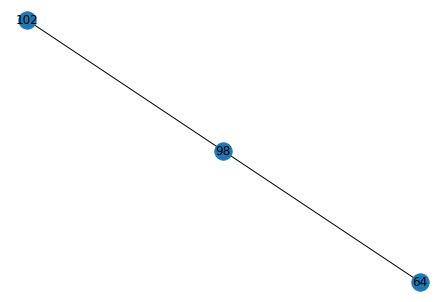

match_branches = [[64, 98]]
edges_to_delete (resolve crossover) = [[64, 102], [98, 102]]
edges_to_create (resolve crossover) = [[64, 98]]
Rejecting creating edge [64, 98] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([64, 98]), array([ 64, 102]), array([ 98, 102])]
edges_to_create = []
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 133, 6, 135, 8, 9, 10, 11, 12, 7, 14, 15, 144, 13, 146, 147, 148, 145, 20, 149, 150, 151, 19, 23, 28, 27, 30, 31, 5, 33, 34, 36, 37, 40, 42, 45, 46, 47, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 76, 79, 17, 88, 18, 92, 93.0, 94, 95, 96, 99, 100, 101, 104, 105, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 126, 127}
Comp 1 = {128, 129, 130, 131, 132, 134, 136, 137, 138, 139, 140, 141, 142, 143, 16, 21, 152, 153, 154, 155, 26, 29, 157, 159, 32, 158, 25, 156, 160, 161, 38, 39, 35, 41, 43, 44, 48, 49, 50, 51, 52, 53, 54, 55, 56, 66, 67, 69, 70, 71, 72, 73, 74, 75, 77, 78, 80, 81, 82, 83, 8

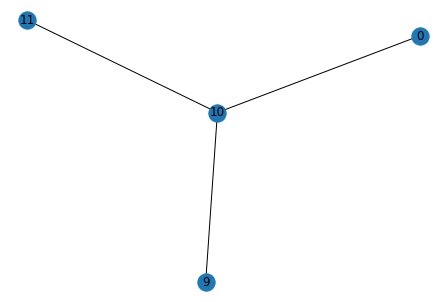

match_branches = [[0, 11]]
edges_to_delete (resolve crossover) = [[0, 9], [0, 10], [9, 10], [9, 11], [10, 11]]
edges_to_create (resolve crossover) = [[0, 11]]
curr_limb.deleted_edges 5 =[[16, 17], [16, 19], [16, 22], [17, 21], [17, 22], [19, 21], [19, 22], [21, 22], [16, 17], [16, 19], [16, 22], [17, 21], [17, 22], [19, 21], [19, 22], [21, 22], array([64, 98]), array([ 64, 102]), array([ 98, 102])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[0, 9], [0, 10], [9, 10], [9, 11], [10, 11]]
edges_to_create = [[0, 11]]
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 133, 6, 7, 8, 9, 135, 11, 5, 13, 14, 15, 144, 145, 146, 147, 148, 149, 150, 151, 23, 20, 19, 27, 28, 30, 31, 33, 34, 36, 37, 40, 42, 45, 46, 47, 10, 57, 58, 59, 60, 61, 62, 63, 64, 65, 12, 68, 76, 79, 17, 88, 18, 92, 93.0, 94, 95, 96, 99, 100, 101, 104, 105, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 126, 127}
Comp 1 = {128, 129, 130, 131, 132, 134, 136, 137, 138, 139, 140, 141, 142, 143, 16, 21,

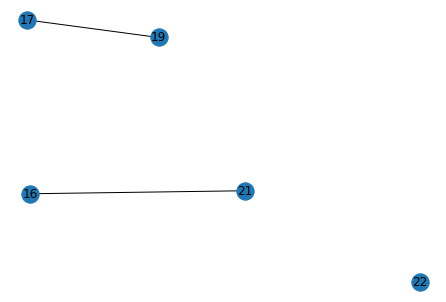

match_branches = [[17, 19], [16, 21]]
edges_to_delete (resolve crossover) = [[16, 17], [16, 19], [16, 22], [17, 21], [17, 22], [19, 21], [19, 22], [21, 22]]
edges_to_create (resolve crossover) = [[17, 19], [16, 21]]
curr_limb.deleted_edges 5 =[[16, 17], [16, 19], [16, 22], [17, 21], [17, 22], [19, 21], [19, 22], [21, 22], [16, 17], [16, 19], [16, 22], [17, 21], [17, 22], [19, 21], [19, 22], [21, 22], array([64, 98]), array([ 64, 102]), array([ 98, 102]), [0, 9], [0, 10], [9, 10], [9, 11], [10, 11]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[16, 17], [16, 19], [16, 22], [17, 21], [17, 22], [19, 21], [19, 22], [21, 22]]
edges_to_create = [[17, 19], [16, 21]]
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 133, 6, 7, 8, 9, 135, 11, 5, 13, 14, 15, 144, 145, 146, 147, 148, 149, 150, 151, 23, 20, 19, 27, 28, 30, 31, 33, 34, 36, 37, 40, 42, 45, 46, 47, 10, 57, 58, 59, 60, 61, 62, 63, 64, 65, 12, 68, 76, 79, 17, 88, 18, 92, 93.0, 94, 95, 96, 99, 100, 101, 104, 105, 108,

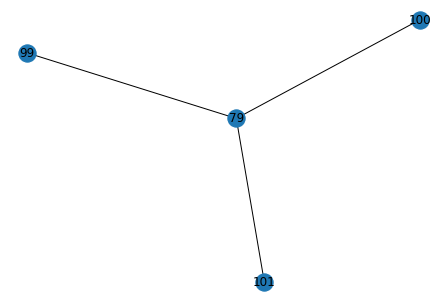

match_branches = [[99, 101]]
edges_to_delete (resolve crossover) = [[79, 99], [79, 100], [79, 101], [99, 100], [100, 101]]
edges_to_create (resolve crossover) = [[99, 101]]
curr_limb.deleted_edges 5 =[[16, 17], [16, 19], [16, 22], [17, 21], [17, 22], [19, 21], [19, 22], [21, 22], [16, 17], [16, 19], [16, 22], [17, 21], [17, 22], [19, 21], [19, 22], [21, 22], array([64, 98]), array([ 64, 102]), array([ 98, 102]), [0, 9], [0, 10], [9, 10], [9, 11], [10, 11], [16, 17], [16, 19], [16, 22], [17, 21], [17, 22], [19, 21], [19, 22], [21, 22]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[79, 99], [79, 100], [79, 101], [99, 100], [100, 101]]
edges_to_create = [[99, 101]]
Number of connected components = 7
Comp 0 = {1, 3, 4, 133, 6, 135, 5, 10, 12, 144, 145, 146, 147, 148, 149, 150, 151, 23, 20, 19, 27, 28, 33, 34, 40, 42, 45, 46, 57, 58, 61, 62, 63, 64, 65, 17, 88, 18, 92, 93.0, 95, 96, 99, 101, 104, 105, 108, 109, 110, 111, 112, 115, 126, 127}
Comp 1 = {0, 2, 68, 37, 36, 7, 8, 9, 11, 

  Edge: [18 17]: curr_angle = 22.39
  Edge: [17 19]: curr_angle = 6.41
  Edge: [19 20]: curr_angle = 34.79
  Edge: [20 23]: curr_angle = 30.15
  Edge: [23 28]: curr_angle = 17.3
  Edge: [28 40]: curr_angle = 39.43
  Edge: [40 57]: curr_angle = 171.02
  Edge: [57 65]: curr_angle = 29.13
  Edge: [ 65 108]: curr_angle = 28.25
  Edge: [108 111]: curr_angle = 32.45
  Edge: [111 104]: curr_angle = 21.1
  Edge: [104 101]: curr_angle = 17.4
  Edge: [101  99]: curr_angle = 12.18

Total time for doubling_back = 0.9143908023834229
There were 1 edges that passed doubling back threshold of 100
Winning edge [40 57] had a doubling back of 171.02201744502503
***inside resolve crossover!!!!****
coordinate_branches = [40, 57, 63]
40 = red
57 = aqua
63 = purple
Angle between 40 and 57 = 158.81 
Angle between 40 and 63 = 27.38 
Angle between 57 and 63 = 20.16 
Final Matches = [[40, 63], [57, 63]]
matched_branches_revised = [[57, 63]]
Original graph


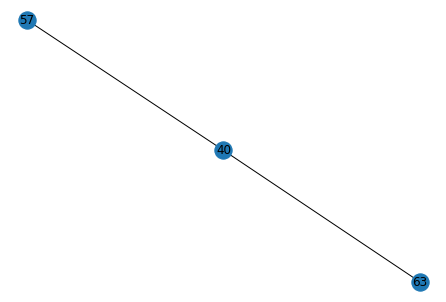

match_branches = [[57, 63]]
edges_to_delete (resolve crossover) = [[40, 57], [40, 63]]
edges_to_create (resolve crossover) = [[57, 63]]
edges_to_delete (cut_limb_network) = [array([40, 57]), array([40, 63])]
edges_to_create = [[57, 63]]
Number of connected components = 8
Comp 0 = {133, 135, 144, 145, 146, 147, 148, 149, 150, 151, 33, 34, 45, 46, 57, 58, 61, 62, 63, 64, 65, 99, 101, 104, 105, 108, 109, 110, 111, 112, 115, 126, 127}
Comp 1 = {0, 2, 68, 37, 36, 7, 8, 9, 11, 76, 13, 14, 15, 79, 47, 59, 60, 30, 31}
Comp 2 = {100, 113, 114, 116, 117, 118, 94}
Comp 3 = {1, 3, 4, 5, 6, 10, 12, 17, 18, 19, 20, 23, 27, 28, 40, 42, 88, 92, 93.0, 95, 96}
Comp 4 = {128, 129, 130, 131, 132, 134, 136, 137, 138, 139, 140, 141, 142, 143, 16, 21, 152, 153, 154, 155, 26, 29, 157, 159, 32, 158, 25, 156, 160, 161, 38, 39, 35, 41, 43, 44, 48, 49, 50, 51, 52, 53, 54, 55, 56, 66, 67, 69, 70, 71, 72, 73, 74, 75, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 24, 97, 103, 106, 107, 119, 120, 121, 122, 123,

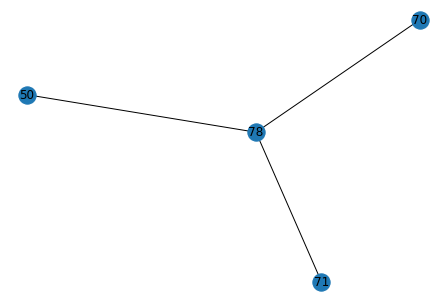

match_branches = []
edges_to_delete (resolve crossover) = [[50, 70], [50, 71], [50, 78], [70, 71], [70, 78], [71, 78]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[[16, 17], [16, 19], [16, 22], [17, 21], [17, 22], [19, 21], [19, 22], [21, 22], [16, 17], [16, 19], [16, 22], [17, 21], [17, 22], [19, 21], [19, 22], [21, 22], array([64, 98]), array([ 64, 102]), array([ 98, 102]), [0, 9], [0, 10], [9, 10], [9, 11], [10, 11], [16, 17], [16, 19], [16, 22], [17, 21], [17, 22], [19, 21], [19, 22], [21, 22], [79, 99], [79, 100], [79, 101], [99, 100], [100, 101], array([40, 57]), array([40, 63])]
Skipping endnode 138 because skeletal distance was 1949.9393905711481 and threshold was 2500
skip_nodes = [138]
edges_to_delete (cut_limb_network) = [[50, 70], [50, 71], [50, 78], [70, 71], [70, 78], [71, 78]]
edges_to_create = []
Number of connected components = 12
Comp 0 = {133, 135, 144, 145, 146, 147, 148, 149, 150, 151, 33, 34, 45, 46, 57, 58, 61, 62, 63, 64, 65, 99, 101, 104

  Edge: [0 3]: curr_angle = 14.65
  Edge: [3 6]: curr_angle = 12.35
  Edge: [6 8]: curr_angle = 19.09
  Edge: [ 8 14]: curr_angle = 52.53
  Edge: [14 13]: curr_angle = 106.48
  Edge: [13 11]: curr_angle = 4.58
  Edge: [11 10]: curr_angle = 31.27

Total time for doubling_back = 0.5893118381500244
There were 1 edges that passed doubling back threshold of 100
Winning edge [14 13] had a doubling back of 106.47772003963229
***inside resolve crossover!!!!****
coordinate_branches = [13, 14, 16]
13 = red
14 = aqua
16 = purple
Angle between 13 and 14 = 107.3 
Angle between 13 and 16 = 22.89 
Angle between 14 and 16 = 61.66 
Final Matches = [[13, 16]]
matched_branches_revised = [[13, 16]]
Original graph


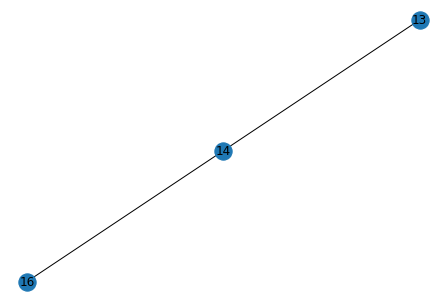

match_branches = [[13, 16]]
edges_to_delete (resolve crossover) = [[13, 14], [14, 16]]
edges_to_create (resolve crossover) = [[13, 16]]
edges_to_delete (cut_limb_network) = [array([13, 14]), array([14, 16])]
edges_to_create = [[13, 16]]
Number of connected components = 2
Comp 0 = {0, 2, 3, 5, 6, 7, 8, 14, 15}
Comp 1 = {1, 4, 9, 10, 11, 12, 13, 16}
curr_limb_copy.deleted_edges = [array([13, 14]), array([14, 16])]
curr_limb_copy.created_edges = [[13, 16]]
After get best cut: cut_edges = [array([13, 14]), array([14, 16])], added_edges = [[13, 16]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  2,  3,  5,  6,  7,  8, 14, 15]), array([ 1,  4,  9, 10, 11, 12, 13, 16])]


 -------- Working on limb 10-----------

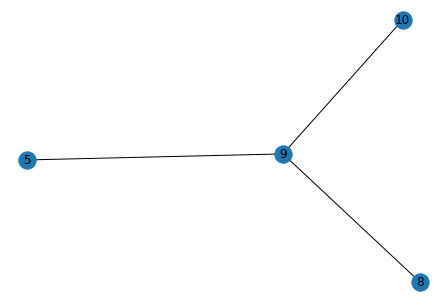

match_branches = [[5, 9], [8, 10]]
edges_to_delete (resolve crossover) = [[5, 8], [5, 10], [8, 9], [9, 10]]
edges_to_create (resolve crossover) = [[5, 9], [8, 10]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 9 because skeletal distance was 483.25034611169144 and threshold was 2500
Could not used the revised endnodes path because empty
skip_nodes = []
edges_to_delete (cut_limb_network) = [[5, 8], [5, 10], [8, 9], [9, 10]]
edges_to_create = [[5, 9], [8, 10]]
Number of connected components = 2
Comp 0 = {9, 5}
Comp 1 = {0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14}
curr_limb_copy.deleted_edges = [[5, 8], [5, 10], [8, 9], [9, 10]]
curr_limb_copy.created_edges = [[5, 9], [8, 10]]
After get best cut: cut_edges = [[5, 8], [5, 10], [8, 9], [9, 10]], added_edges = [[5, 9], [8, 10]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL 

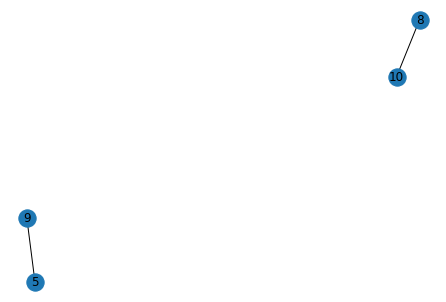

match_branches = [[5, 9], [8, 10]]
edges_to_delete (resolve crossover) = [[5, 8], [5, 10], [8, 9], [9, 10]]
edges_to_create (resolve crossover) = [[5, 9], [8, 10]]
curr_limb.deleted_edges 5 =[[5, 8], [5, 10], [8, 9], [9, 10]]
Skipping endnode 11 because skeletal distance was 2185.5268879911964 and threshold was 2500
skip_nodes = [11]
edges_to_delete (cut_limb_network) = [[5, 8], [5, 10], [8, 9], [9, 10]]
edges_to_create = [[5, 9], [8, 10]]
Number of connected components = 2
Comp 0 = {9, 5}
Comp 1 = {0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14}
curr_limb_copy.deleted_edges = [[5, 8], [5, 10], [8, 9], [9, 10], [5, 8], [5, 10], [8, 9], [9, 10]]
curr_limb_copy.created_edges = [[5, 9], [8, 10], [5, 9], [8, 10]]
After get best cut: cut_edges = [[5, 8], [5, 10], [8, 9], [9, 10]], added_edges = [[5, 9], [8, 10]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end 

  Edge: [10  8]: curr_angle = 29.01
  Edge: [8 2]: curr_angle = 54.83
  Edge: [2 6]: curr_angle = 124.31

Total time for doubling_back = 0.07659554481506348
There were 1 edges that passed doubling back threshold of 100
Winning edge [2 6] had a doubling back of 124.31064130737333
***inside resolve crossover!!!!****
coordinate_branches = [2, 3, 6]
2 = red
3 = aqua
6 = purple
Angle between 2 and 3 = 90.26 
Angle between 2 and 6 = 60.29 
Angle between 3 and 6 = 30.26 
Final Matches = [[3, 6]]
matched_branches_revised = [[3, 6]]
Original graph


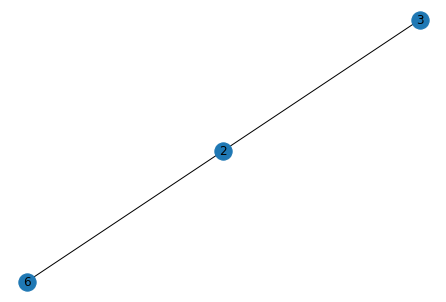

match_branches = [[3, 6]]
edges_to_delete (resolve crossover) = [[2, 3], [2, 6]]
edges_to_create (resolve crossover) = [[3, 6]]
edges_to_delete (cut_limb_network) = [array([2, 3]), array([2, 6])]
edges_to_create = [[3, 6]]
Number of connected components = 3
Comp 0 = {9, 5}
Comp 1 = {8, 10, 2, 7}
Comp 2 = {0, 1, 3, 4, 6, 11, 12, 13, 14}
curr_limb_copy.deleted_edges = [[5, 8], [5, 10], [8, 9], [9, 10], [5, 8], [5, 10], [8, 9], [9, 10], array([2, 3]), array([2, 6])]
curr_limb_copy.created_edges = [[5, 9], [8, 10], [5, 9], [8, 10], [3, 6]]
After get best cut: cut_edges = [array([2, 3]), array([2, 6])], added_edges = [[3, 6]]
total_soma_paths_to_cut = [[5, 8], [5, 10], [8, 9], [9, 10]]
-----------counter = 1------------
 Cut iteration 2
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection


---- working on disconnecting 10 and 12
---- This disconnects S3_3 f

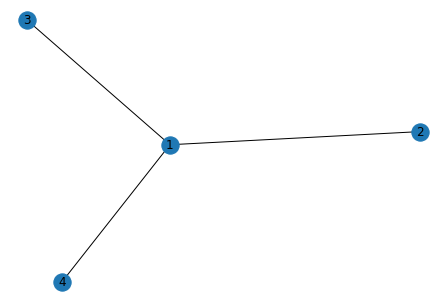

match_branches = [[1, 3]]
edges_to_delete (resolve crossover) = [[1, 2], [1, 4], [2, 3], [2, 4], [3, 4]]
edges_to_create (resolve crossover) = [[1, 3]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 5 because skeletal distance was 2295.5958445238307 and threshold was 2500
skip_nodes = [5]
edges_to_delete (cut_limb_network) = [[1, 2], [1, 4], [2, 3], [2, 4], [3, 4]]
edges_to_create = [[1, 3]]
Number of connected components = 3
Comp 0 = {1, 3}
Comp 1 = {0, 2, 5}
Comp 2 = {4}
curr_limb_copy.deleted_edges = [[1, 2], [1, 4], [2, 3], [2, 4], [3, 4]]
curr_limb_copy.created_edges = [[1, 3]]
After get best cut: cut_edges = [[1, 2], [1, 4], [2, 3], [2, 4], [3, 4]], added_edges = [[1, 3]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the spl

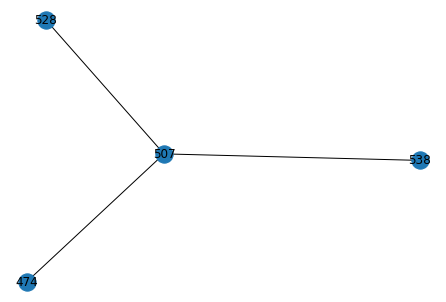

match_branches = [[474, 538], [507, 528]]
edges_to_delete (resolve crossover) = [[474, 507], [474, 528], [507, 538], [528, 538]]
edges_to_create (resolve crossover) = [[474, 538], [507, 528]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[474, 507], [474, 528], [507, 538], [528, 538]]
edges_to_create = [[474, 538], [507, 528]]
Number of connected components = 3
Comp 0 = {545, 929, 516, 460, 527, 528, 944, 945, 533, 534, 505, 507, 508, 509, 926, 543}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121

  Edge: [486 467]: curr_angle = 14.53
  Edge: [467 591]: curr_angle = 56.17
  Edge: [591 590]: curr_angle = 97.95
  Edge: [590 629]: curr_angle = 79.09
  Edge: [629 635]: curr_angle = 26.55
  Edge: [635 655]: curr_angle = 48.23
  Edge: [655 821]: curr_angle = 13.2
  Edge: [821 895]: curr_angle = 65.46
  Edge: [895 888]: curr_angle = 20.42
  Edge: [888 883]: curr_angle = 10.65
  Edge: [883 878]: curr_angle = 8.75
  Edge: [878 911]: curr_angle = 20.42
  Edge: [911 909]: curr_angle = 55.66
  Edge: [909 907]: curr_angle = 26.38

Total time for doubling_back = 0.9095993041992188

Attempting the width jump check (attempting from both sides)
  Edge: [486 467]: jump = -822.4
  Edge: [467 591]: jump = -232.29
  Edge: [591 590]: jump = 211.94
Adding error edge [591 590] because width jump was 211.93815871667016
  Edge: [590 629]: jump = -232.37
  Edge: [629 635]: jump = -105.41
  Edge: [635 655]: jump = 150.27
  Edge: [655 821]: jump = -105.34
  Edge: [821 895]: jump = -114.52
  Edge: [895 888]:

  Edge: [6 7]: curr_angle = 39.14
  Edge: [7 9]: curr_angle = 24.04
  Edge: [ 9 10]: curr_angle = 156.0
  Edge: [10  2]: curr_angle = 116.73
  Edge: [2 3]: curr_angle = 107.6
  Edge: [3 8]: curr_angle = 153.3

Total time for doubling_back = 0.29969191551208496
There were 4 edges that passed doubling back threshold of 100
Winning edge [ 9 10] had a doubling back of 156.00345351813684
***inside resolve crossover!!!!****
coordinate_branches = [9, 10, 11]
9 = red
10 = aqua
11 = purple
Angle between 9 and 10 = 23.18 
Angle between 9 and 11 = 50.78 
Angle between 10 and 11 = 110.47 
Final Matches = [[9, 10]]
matched_branches_revised = [[9, 10]]
Original graph


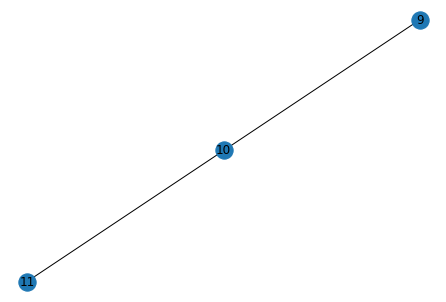

match_branches = [[9, 10]]
edges_to_delete (resolve crossover) = [[9, 11], [10, 11]]
edges_to_create (resolve crossover) = [[9, 10]]
Rejecting creating edge [9, 10] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([ 9, 10]), array([ 9, 11]), array([10, 11])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 8, 10, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44}
Comp 1 = {4, 5, 6, 7, 9}
Comp 2 = {11, 13, 14}
curr_limb_copy.deleted_edges = [array([ 9, 10]), array([ 9, 11]), array([10, 11])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([ 9, 10]), array([ 9, 11]), array([10, 11])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL

  Edge: [8 3]: curr_angle = 64.39
  Edge: [3 2]: curr_angle = 105.0
  Edge: [ 2 10]: curr_angle = 116.73
  Edge: [10 12]: curr_angle = 82.22
  Edge: [12 21]: curr_angle = 36.99
  Edge: [21 20]: curr_angle = 23.77
  Edge: [20 19]: curr_angle = 22.47

Total time for doubling_back = 0.5299830436706543
There were 2 edges that passed doubling back threshold of 100
Winning edge [ 2 10] had a doubling back of 116.728036416779
***inside resolve crossover!!!!****
coordinate_branches = [2, 10, 12]
2 = red
10 = aqua
12 = purple
Angle between 2 and 10 = 124.32 
Angle between 2 and 12 = 32.43 
Angle between 10 and 12 = 87.87 
Final Matches = [[2, 12]]
matched_branches_revised = [[2, 12]]
Original graph


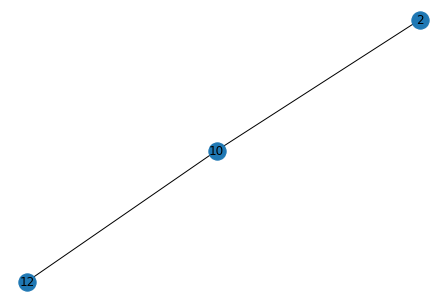

match_branches = [[2, 12]]
edges_to_delete (resolve crossover) = [[2, 10], [10, 12]]
edges_to_create (resolve crossover) = [[2, 12]]
edges_to_delete (cut_limb_network) = [array([ 2, 10]), array([10, 12])]
edges_to_create = [[2, 12]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 8, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44}
Comp 1 = {10}
Comp 2 = {4, 5, 6, 7, 9}
Comp 3 = {11, 13, 14}
curr_limb_copy.deleted_edges = [array([ 9, 10]), array([ 9, 11]), array([10, 11]), array([ 2, 10]), array([10, 12])]
curr_limb_copy.created_edges = [[2, 12]]
After get best cut: cut_edges = [array([ 2, 10]), array([10, 12])], added_edges = [[2, 12]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
Shortest path = [8, 3, 2, 12, 21, 20, 19, 23]

 ----

  Edge: [8 3]: curr_angle = 64.39
  Edge: [3 2]: curr_angle = 105.0
  Edge: [ 2 12]: curr_angle = 19.45
  Edge: [12 21]: curr_angle = 36.99
  Edge: [21 20]: curr_angle = 23.77
  Edge: [20 19]: curr_angle = 22.47

Total time for doubling_back = 0.3212096691131592
There were 1 edges that passed doubling back threshold of 100
Winning edge [3 2] had a doubling back of 104.99664526816184
***inside resolve crossover!!!!****
coordinate_branches = [1, 2, 3]
1 = red
2 = aqua
3 = purple
Angle between 1 and 2 = 27.71 
Angle between 1 and 3 = 86.44 
Angle between 2 and 3 = 120.41 
Final Matches = [[1, 2]]
matched_branches_revised = [[1, 2]]
Original graph


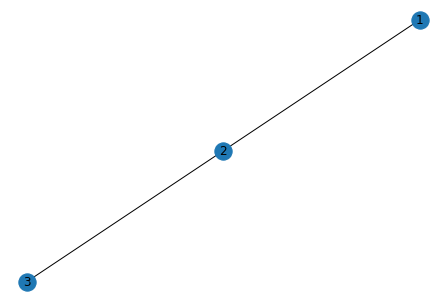

match_branches = [[1, 2]]
edges_to_delete (resolve crossover) = [[1, 3], [2, 3]]
edges_to_create (resolve crossover) = [[1, 2]]
edges_to_delete (cut_limb_network) = [array([1, 3]), array([2, 3])]
edges_to_create = [[1, 2]]
Number of connected components = 5
Comp 0 = {1, 2, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44}
Comp 1 = {10}
Comp 2 = {0, 8, 3}
Comp 3 = {4, 5, 6, 7, 9}
Comp 4 = {11, 13, 14}
curr_limb_copy.deleted_edges = [array([ 9, 10]), array([ 9, 11]), array([10, 11]), array([ 2, 10]), array([10, 12]), array([1, 3]), array([2, 3])]
curr_limb_copy.created_edges = [[2, 12], [1, 2]]
After get best cut: cut_edges = [array([1, 3]), array([2, 3])], added_edges = [[1, 2]]
total_soma_paths_to_cut = [array([ 2, 10]), array([10, 12])]
-----------counter = 1------------
 Cut iteration 2
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 5
Total number of graphs at the end of the split AFTER DIR

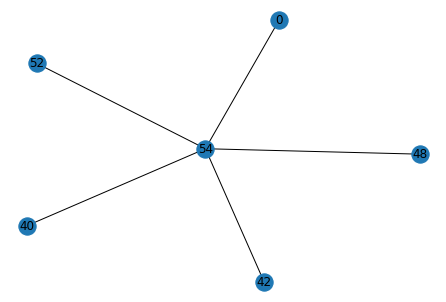

match_branches = [[42, 54]]
edges_to_delete (resolve crossover) = [[0, 40], [0, 42], [0, 48], [0, 52], [0, 54], [40, 42], [40, 48], [40, 52], [40, 54], [42, 48], [42, 52], [48, 52], [48, 54], [52, 54]]
edges_to_create (resolve crossover) = [[42, 54]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 69 because skeletal distance was 668.4163290279771 and threshold was 2500
skip_nodes = [69]
edges_to_delete (cut_limb_network) = [[0, 40], [0, 42], [0, 48], [0, 52], [0, 54], [40, 42], [40, 48], [40, 52], [40, 54], [42, 48], [42, 52], [48, 52], [48, 54], [52, 54]]
edges_to_create = [[42, 54]]
Number of connected components = 8
Comp 0 = {10, 21, 37, 38, 44, 45, 47, 52, 56, 57, 58, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}
Comp 1 = {0}
Comp 2 = {40}
Comp 3 = {1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 39, 41, 42, 43, 46, 50, 54, 55, 59, 60}
Comp 4 = {48}
Comp 5 = {49}
Comp 6 = {51}
Comp 7 = {53}

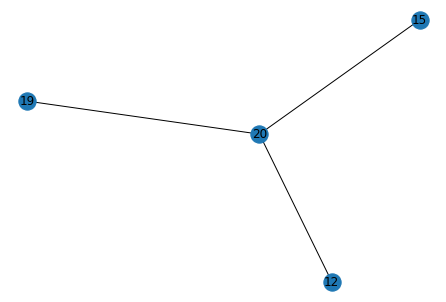

match_branches = [[12, 20], [15, 19]]
edges_to_delete (resolve crossover) = [[12, 15], [12, 19], [15, 20], [19, 20]]
edges_to_create (resolve crossover) = [[12, 20], [15, 19]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 28 because skeletal distance was 1064.2983352630965 and threshold was 2500
skip_nodes = [28]
edges_to_delete (cut_limb_network) = [[12, 15], [12, 19], [15, 20], [19, 20]]
edges_to_create = [[12, 20], [15, 19]]
Number of connected components = 2
Comp 0 = {1, 2, 3, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82}
Comp 1 = {0, 4, 5, 12, 20, 23, 24, 27}
curr_limb_copy.deleted_edges = [[12, 15], [12, 19], [15, 20], [19, 20]]
curr_limb_copy.created_edges = [[12, 20], [15, 19]]
After get best cut: cut_edges = [[12, 15], [12, 19], [15, 20], [19

  Edge: [25 11]: curr_angle = 46.95
  Edge: [11  2]: curr_angle = 11.28
  Edge: [2 3]: curr_angle = 110.51
  Edge: [ 3 16]: curr_angle = 35.54
  Edge: [16 30]: curr_angle = 55.02
  Edge: [30 29]: curr_angle = 35.06

Total time for doubling_back = 0.48121118545532227
There were 1 edges that passed doubling back threshold of 100
Winning edge [2 3] had a doubling back of 110.5133867644189
***inside resolve crossover!!!!****
coordinate_branches = [1, 2, 3]
1 = red
2 = aqua
3 = purple
Angle between 1 and 2 = 16.27 
Angle between 1 and 3 = 77.52 
Angle between 2 and 3 = 97.4 
Final Matches = [[1, 2]]
matched_branches_revised = [[1, 2]]
Original graph


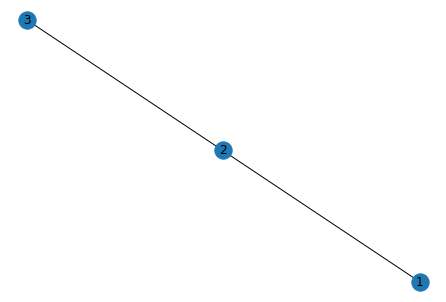

match_branches = [[1, 2]]
edges_to_delete (resolve crossover) = [[1, 3], [2, 3]]
edges_to_create (resolve crossover) = [[1, 2]]
edges_to_delete (cut_limb_network) = [array([1, 3]), array([2, 3])]
edges_to_create = [[1, 2]]
Number of connected components = 3
Comp 0 = {3, 6, 15, 16, 19, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82}
Comp 1 = {1, 2, 7, 8, 9, 10, 11, 13, 14, 17, 18, 21, 22, 25, 26, 28}
Comp 2 = {0, 4, 5, 12, 20, 23, 24, 27}
curr_limb_copy.deleted_edges = [[12, 15], [12, 19], [15, 20], [19, 20], array([1, 3]), array([2, 3])]
curr_limb_copy.created_edges = [[12, 20], [15, 19], [1, 2]]
After get best cut: cut_edges = [array([1, 3]), array([2, 3])], added_edges = [[1, 2]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECT

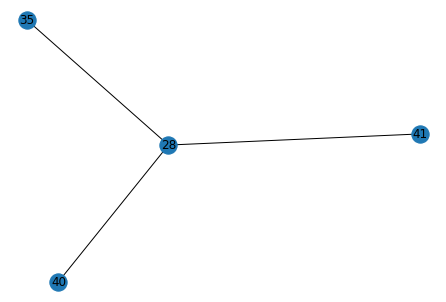

match_branches = [[28, 41], [35, 40]]
edges_to_delete (resolve crossover) = [[28, 35], [28, 40], [35, 41], [40, 41]]
edges_to_create (resolve crossover) = [[28, 41], [35, 40]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[28, 35], [28, 40], [35, 41], [40, 41]]
edges_to_create = [[28, 41], [35, 40]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 41}
Comp 1 = {9, 26, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82}
Comp 2 = {37}
curr_limb_copy.deleted_edges = [[28, 35], [28, 40], [35, 41], [40, 41]]
curr_limb_copy.created_edges = [[28, 41], [35, 40]]
After get best cut: cut_edges = [[28, 35], [28, 40], [35, 41], [40, 41]], added_edges = [[28, 41], [35, 40]]
total_soma_paths_to_cut = []
-----------c

  Edge: [60 58]: curr_angle = 21.8
  Edge: [58 54]: curr_angle = 29.32
  Edge: [54 52]: curr_angle = 47.88
  Edge: [52 33]: curr_angle = 13.87
  Edge: [33 31]: curr_angle = 30.28
  Edge: [31 36]: curr_angle = 94.46
  Edge: [36 38]: curr_angle = 71.44
  Edge: [38 67]: curr_angle = 8.51
  Edge: [67 68]: curr_angle = 37.55
  Edge: [68 70]: curr_angle = 46.26

Total time for doubling_back = 1.3692843914031982

Attempting the width jump check (attempting from both sides)
  Edge: [60 58]: jump = -105.82
  Edge: [58 54]: jump = 18.15
  Edge: [54 52]: jump = -85.98
  Edge: [52 33]: jump = -124.49
  Edge: [33 31]: jump = -32.74
  Edge: [31 36]: jump = 177.02
  Edge: [36 38]: jump = 105.07
  Edge: [38 67]: jump = 90.85
  Edge: [67 68]: jump = 11.6
  Edge: [68 70]: jump = 306.3
Adding error edge [68 70] because width jump was 306.3007597545893
Total time for width = 1.3375723361968994
Path starting at 60 had err_edges: [[68, 70]]
  Edge: [70 68]: jump = -306.3
  Edge: [68 67]: jump = -11.6
  Edge

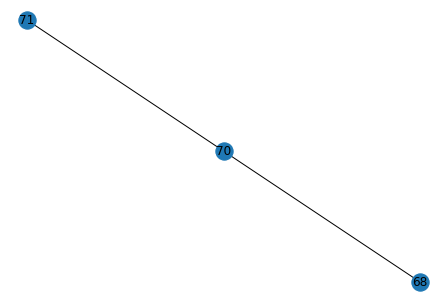

match_branches = []
edges_to_delete (resolve crossover) = [[68, 70], [68, 71], [70, 71]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([68, 70]), array([68, 71]), array([70, 71])]
edges_to_create = []
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 41}
Comp 1 = {9, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 67, 68}
Comp 2 = {70}
Comp 3 = {65, 66, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 26, 63}
Comp 4 = {37}
curr_limb_copy.deleted_edges = [[28, 35], [28, 40], [35, 41], [40, 41], array([68, 70]), array([68, 71]), array([70, 71])]
curr_limb_copy.created_edges = [[28, 41], [35, 40]]
After get best cut: cut_edges = [array([68, 70]), array([68, 71]), array([70, 71])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iterati

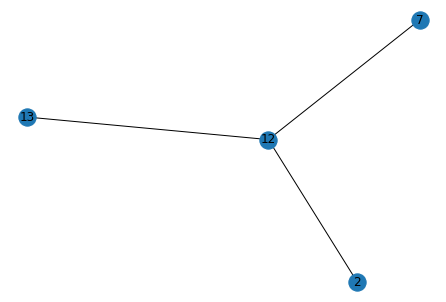

match_branches = [[2, 12]]
edges_to_delete (resolve crossover) = [[2, 7], [2, 13], [7, 12], [7, 13], [12, 13]]
edges_to_create (resolve crossover) = [[2, 12]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[2, 7], [2, 13], [7, 12], [7, 13], [12, 13]]
edges_to_create = [[2, 12]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14, 15, 17, 18, 19, 20, 27, 28, 33, 34, 36, 37, 46, 47, 61, 65, 66, 68, 69, 70}
Comp 1 = {7}
Comp 2 = {4, 10, 13, 16, 21, 22, 23, 24, 25, 26, 29, 30, 31, 32, 35, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 67, 71, 72, 73, 74, 75, 76, 77, 78}
curr_limb_copy.deleted_edges = [[2, 7], [2, 13], [7, 12], [7, 13], [12, 13]]
curr_limb_copy.created_edges = [[2, 12]]
After get best cut: cut_edges = [[2, 7], [2, 13], [7, 12], [7, 13], [12, 13]], added_edges = [[2, 12]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total numbe

  Edge: [37 34]: curr_angle = 69.53
  Edge: [34 28]: curr_angle = 54.36
  Edge: [28 33]: curr_angle = 15.22
  Edge: [33 61]: curr_angle = 44.55

Total time for doubling_back = 0.17330050468444824

Attempting the width jump check (attempting from both sides)
  Edge: [37 34]: jump = -220.43
  Edge: [34 28]: jump = 131.05
  Edge: [28 33]: jump = -87.82
  Edge: [33 61]: jump = 131.7
Total time for width = 0.1328737735748291
Path starting at 37 had err_edges: []
  Edge: [61 33]: jump = -131.7
  Edge: [33 28]: jump = 87.82
  Edge: [28 34]: jump = -131.05
  Edge: [34 37]: jump = 220.43
Adding error edge [34 37] because width jump was 220.4334627147944
Total time for width = 0.13664841651916504
Path starting at 61 had err_edges: [[34, 37]]
first_error_sizes = [-inf, 220.4334627147944], winning_path = 1
***inside resolve crossover!!!!****
coordinate_branches = [3, 34, 37]
3 = red
34 = aqua
37 = purple
Angle between 3 and 34 = 126.31 
Angle between 3 and 37 = 10.37 
Angle between 34 and 37 = 59.

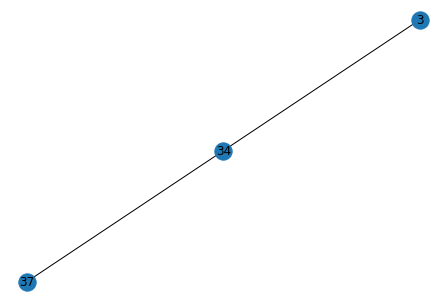

match_branches = [[3, 37]]
edges_to_delete (resolve crossover) = [[3, 34], [34, 37]]
edges_to_create (resolve crossover) = [[3, 37]]
edges_to_delete (cut_limb_network) = [array([ 3, 34]), array([34, 37])]
edges_to_create = [[3, 37]]
Number of connected components = 4
Comp 0 = {3, 37}
Comp 1 = {0, 1, 2, 5, 6, 8, 9, 11, 12, 14, 15, 17, 18, 19, 20, 27, 28, 33, 34, 36, 46, 47, 61, 65, 66, 68, 69, 70}
Comp 2 = {7}
Comp 3 = {4, 10, 13, 16, 21, 22, 23, 24, 25, 26, 29, 30, 31, 32, 35, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 67, 71, 72, 73, 74, 75, 76, 77, 78}
curr_limb_copy.deleted_edges = [[2, 7], [2, 13], [7, 12], [7, 13], [12, 13], array([ 3, 34]), array([34, 37])]
curr_limb_copy.created_edges = [[2, 12], [3, 37]]
After get best cut: cut_edges = [array([ 3, 34]), array([34, 37])], added_edges = [[3, 37]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFOR

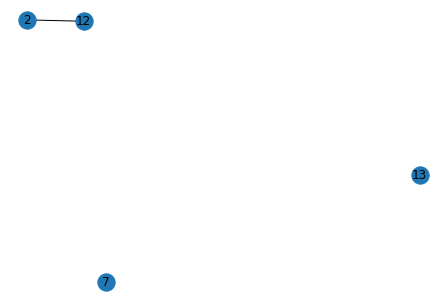

match_branches = [[2, 12]]
edges_to_delete (resolve crossover) = [[2, 7], [2, 13], [7, 12], [7, 13], [12, 13]]
edges_to_create (resolve crossover) = [[2, 12]]
curr_limb.deleted_edges 5 =[[2, 7], [2, 13], [7, 12], [7, 13], [12, 13], array([ 3, 34]), array([34, 37])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[2, 7], [2, 13], [7, 12], [7, 13], [12, 13]]
edges_to_create = [[2, 12]]
Number of connected components = 4
Comp 0 = {3, 37}
Comp 1 = {0, 1, 2, 5, 6, 8, 9, 11, 12, 14, 15, 17, 18, 19, 20, 27, 28, 33, 34, 36, 46, 47, 61, 65, 66, 68, 69, 70}
Comp 2 = {7}
Comp 3 = {4, 10, 13, 16, 21, 22, 23, 24, 25, 26, 29, 30, 31, 32, 35, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 67, 71, 72, 73, 74, 75, 76, 77, 78}
curr_limb_copy.deleted_edges = [[2, 7], [2, 13], [7, 12], [7, 13], [12, 13], array([ 3, 34]), array([34, 37]), [2, 7], [2, 13], [7, 12], [7, 13], [12, 13]]
curr_limb_copy.created_edges = [[2, 12], [3, 37], [2, 12]]
After get b

  Edge: [57 55]: curr_angle = 8.52
  Edge: [55 48]: curr_angle = 6.23
  Edge: [48 49]: curr_angle = 75.4
  Edge: [49 52]: curr_angle = 95.68
  Edge: [52 54]: curr_angle = 20.39
  Edge: [54 58]: curr_angle = 25.6
  Edge: [58 62]: curr_angle = 3.05
  Edge: [62 13]: curr_angle = 105.64
  Edge: [13 64]: curr_angle = 65.69

Total time for doubling_back = 0.6505835056304932
There were 1 edges that passed doubling back threshold of 100
Winning edge [62 13] had a doubling back of 105.64475467056994
***inside resolve crossover!!!!****
coordinate_branches = [13, 62, 64]
13 = red
62 = aqua
64 = purple
Angle between 13 and 62 = 111.21 
Angle between 13 and 64 = 40.75 
Angle between 62 and 64 = 28.04 
Final Matches = [[62, 64]]
matched_branches_revised = [[62, 64]]
Original graph


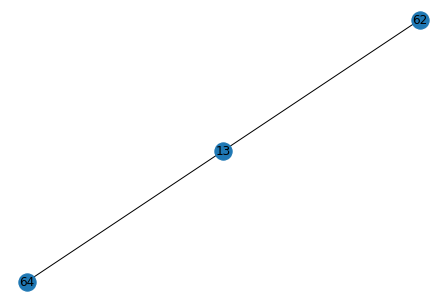

match_branches = [[62, 64]]
edges_to_delete (resolve crossover) = [[13, 62], [13, 64]]
edges_to_create (resolve crossover) = [[62, 64]]
edges_to_delete (cut_limb_network) = [array([13, 62]), array([13, 64])]
edges_to_create = [[62, 64]]
Number of connected components = 5
Comp 0 = {3, 37}
Comp 1 = {0, 1, 2, 5, 6, 8, 9, 11, 12, 14, 15, 17, 18, 19, 20, 27, 28, 33, 34, 36, 46, 47, 61, 65, 66, 68, 69, 70}
Comp 2 = {7}
Comp 3 = {13}
Comp 4 = {4, 10, 16, 21, 22, 23, 24, 25, 26, 29, 30, 31, 32, 35, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 67, 71, 72, 73, 74, 75, 76, 77, 78}
curr_limb_copy.deleted_edges = [[2, 7], [2, 13], [7, 12], [7, 13], [12, 13], array([ 3, 34]), array([34, 37]), [2, 7], [2, 13], [7, 12], [7, 13], [12, 13], array([13, 62]), array([13, 64])]
curr_limb_copy.created_edges = [[2, 12], [3, 37], [2, 12], [62, 64]]
After get best cut: cut_edges = [array([13, 62]), array([13, 64])], added_edges = [[62, 64]]
total_soma_paths_to_

  Edge: [57 55]: curr_angle = 8.52
  Edge: [55 48]: curr_angle = 6.23
  Edge: [48 49]: curr_angle = 75.4
  Edge: [49 52]: curr_angle = 95.68
  Edge: [52 54]: curr_angle = 20.39
  Edge: [54 58]: curr_angle = 25.6
  Edge: [58 62]: curr_angle = 3.05
  Edge: [62 64]: curr_angle = 13.64

Total time for doubling_back = 0.4723398685455322

Attempting the width jump check (attempting from both sides)
  Edge: [57 55]: jump = -85.24
  Edge: [55 48]: jump = 48.96
  Edge: [48 49]: jump = -282.34
  Edge: [49 52]: jump = 84.47
  Edge: [52 54]: jump = 166.01
  Edge: [54 58]: jump = -7.73
  Edge: [58 62]: jump = 23.21
  Edge: [62 64]: jump = 69.49
Total time for width = 0.42198753356933594
Path starting at 57 had err_edges: []
  Edge: [64 62]: jump = -69.49
  Edge: [62 58]: jump = -23.21
  Edge: [58 54]: jump = -14.46
  Edge: [54 52]: jump = -155.03
  Edge: [52 49]: jump = -84.47
  Edge: [49 48]: jump = 282.34
Adding error edge [49 48] because width jump was 282.33860948939525
  Edge: [48 55]: jump = 

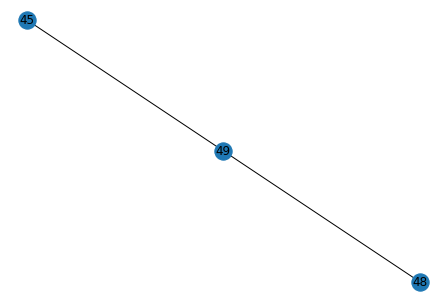

match_branches = [[45, 48]]
edges_to_delete (resolve crossover) = [[45, 49], [48, 49]]
edges_to_create (resolve crossover) = [[45, 48]]
edges_to_delete (cut_limb_network) = [array([45, 49]), array([48, 49])]
edges_to_create = [[45, 48]]
Number of connected components = 5
Comp 0 = {3, 37}
Comp 1 = {0, 1, 2, 5, 6, 8, 9, 11, 12, 14, 15, 17, 18, 19, 20, 27, 28, 33, 34, 36, 46, 47, 61, 65, 66, 68, 69, 70}
Comp 2 = {7}
Comp 3 = {13}
Comp 4 = {4, 10, 16, 21, 22, 23, 24, 25, 26, 29, 30, 31, 32, 35, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 67, 71, 72, 73, 74, 75, 76, 77, 78}
curr_limb_copy.deleted_edges = [[2, 7], [2, 13], [7, 12], [7, 13], [12, 13], array([ 3, 34]), array([34, 37]), [2, 7], [2, 13], [7, 12], [7, 13], [12, 13], array([13, 62]), array([13, 64]), array([45, 49]), array([48, 49])]
curr_limb_copy.created_edges = [[2, 12], [3, 37], [2, 12], [62, 64], [45, 48]]
After get best cut: cut_edges = [array([45, 49]), array([48, 49])], a

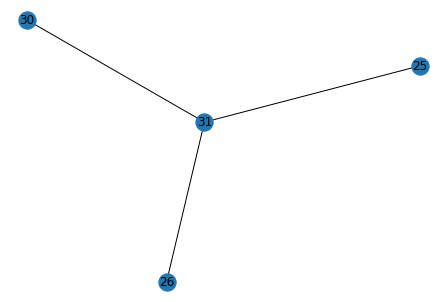

match_branches = [[26, 30], [25, 31]]
edges_to_delete (resolve crossover) = [[25, 26], [25, 30], [26, 31], [30, 31]]
edges_to_create (resolve crossover) = [[26, 30], [25, 31]]
curr_limb.deleted_edges 5 =[[2, 7], [2, 13], [7, 12], [7, 13], [12, 13], array([ 3, 34]), array([34, 37]), [2, 7], [2, 13], [7, 12], [7, 13], [12, 13], array([13, 62]), array([13, 64]), array([45, 49]), array([48, 49])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[25, 26], [25, 30], [26, 31], [30, 31]]
edges_to_create = [[26, 30], [25, 31]]
Number of connected components = 7
Comp 0 = {3, 37}
Comp 1 = {0, 1, 2, 5, 6, 8, 9, 11, 12, 14, 15, 17, 18, 19, 20, 27, 28, 33, 34, 36, 46, 47, 61, 65, 66, 68, 69, 70}
Comp 2 = {7}
Comp 3 = {13}
Comp 4 = {4, 10, 24, 25, 31, 32, 35, 38, 40, 42, 49, 50, 51, 52, 54, 58, 59, 60, 62, 63, 64, 71, 72, 73, 74, 75, 76, 77, 78}
Comp 5 = {67, 39, 41, 43, 44, 45, 48, 16, 55, 22, 23, 56, 57, 26, 53, 21, 30}
Comp 6 = {29}
curr_limb_copy.deleted_edges = [[2, 7], [2, 13], [7, 12], [7

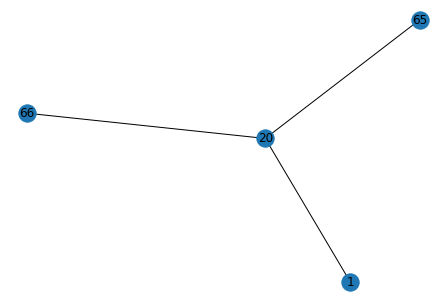

match_branches = [[65, 66]]
edges_to_delete (resolve crossover) = [[1, 20], [1, 65], [1, 66], [20, 65], [20, 66]]
edges_to_create (resolve crossover) = [[65, 66]]
curr_limb.deleted_edges 5 =[[2, 7], [2, 13], [7, 12], [7, 13], [12, 13], array([ 3, 34]), array([34, 37]), [2, 7], [2, 13], [7, 12], [7, 13], [12, 13], array([13, 62]), array([13, 64]), array([45, 49]), array([48, 49]), [25, 26], [25, 30], [26, 31], [30, 31]]
Skipping endnode 66 because skeletal distance was 2315.616183210318 and threshold was 2500
skip_nodes = [66]
edges_to_delete (cut_limb_network) = [[1, 20], [1, 65], [1, 66], [20, 65], [20, 66]]
edges_to_create = [[65, 66]]
Number of connected components = 9
Comp 0 = {3, 37}
Comp 1 = {33, 34, 2, 5, 6, 8, 11, 12, 14, 15, 17, 18, 19, 20, 27, 28, 61}
Comp 2 = {7}
Comp 3 = {13}
Comp 4 = {1}
Comp 5 = {0, 65, 66, 36, 69, 68, 70, 9, 46, 47}
Comp 6 = {4, 10, 24, 25, 31, 32, 35, 38, 40, 42, 49, 50, 51, 52, 54, 58, 59, 60, 62, 63, 64, 71, 72, 73, 74, 75, 76, 77, 78}
Comp 7 = {67, 3

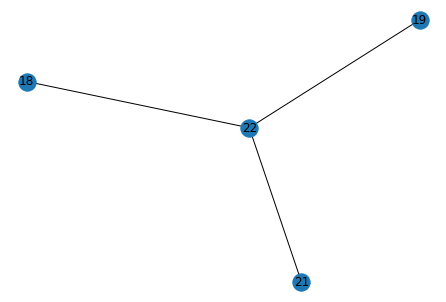

match_branches = [[19, 22]]
edges_to_delete (resolve crossover) = [[18, 19], [18, 21], [18, 22], [19, 21], [21, 22]]
edges_to_create (resolve crossover) = [[19, 22]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 22 because skeletal distance was 1184.5814661727577 and threshold was 2500
skip_nodes = [22]
edges_to_delete (cut_limb_network) = [[18, 19], [18, 21], [18, 22], [19, 21], [21, 22]]
edges_to_create = [[19, 22]]
Number of connected components = 4
Comp 0 = {6, 7, 8, 9, 10, 11, 13, 14, 15, 17, 19, 22, 23, 24, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52}
Comp 1 = {0, 1, 2, 3, 4, 5, 12, 16, 18}
Comp 2 = {25, 29, 21, 30}
Comp 3 = {20}
curr_limb_copy.deleted_edges = [[18, 19], [18, 21], [18, 22], [19, 21], [21, 22]]
curr_limb_copy.created_edges = [[19, 22]]
After get best cut: cut_edges = [[18, 19], [18, 21], [18, 22], [19, 21], [21, 22]], added_edges = [[19, 22]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cu

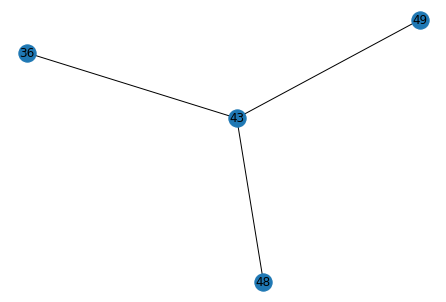

match_branches = [[43, 48]]
edges_to_delete (resolve crossover) = [[36, 43], [36, 48], [36, 49], [43, 49], [48, 49]]
edges_to_create (resolve crossover) = [[43, 48]]
curr_limb.deleted_edges 5 =[[18, 19], [18, 21], [18, 22], [19, 21], [21, 22]]
Skipping endnode 22 because skeletal distance was 1184.5814661727577 and threshold was 2500
skip_nodes = [22]
edges_to_delete (cut_limb_network) = [[36, 43], [36, 48], [36, 49], [43, 49], [48, 49]]
edges_to_create = [[43, 48]]
Number of connected components = 6
Comp 0 = {6, 7, 8, 9, 10, 13, 14, 15, 17, 24, 26, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46, 51, 52}
Comp 1 = {43, 44, 11, 48, 19, 22, 23, 27, 28}
Comp 2 = {49, 50, 47}
Comp 3 = {0, 1, 2, 3, 4, 5, 12, 16, 18}
Comp 4 = {25, 29, 21, 30}
Comp 5 = {20}
curr_limb_copy.deleted_edges = [[18, 19], [18, 21], [18, 22], [19, 21], [21, 22], [36, 43], [36, 48], [36, 49], [43, 49], [48, 49]]
curr_limb_copy.created_edges = [[19, 22], [43, 48]]
After get best cut: cut_edges = [[36, 43], [36, 

  Edge: [0 2]: curr_angle = 41.61
  Edge: [2 8]: curr_angle = 44.48
  Edge: [8 7]: curr_angle = 67.11
  Edge: [ 7 11]: curr_angle = 40.63
  Edge: [11 10]: curr_angle = 46.52

Total time for doubling_back = 0.8292274475097656

Attempting the width jump check (attempting from both sides)
  Edge: [0 2]: jump = -164.97
  Edge: [2 8]: jump = 115.53
  Edge: [8 7]: jump = 27.46
  Edge: [ 7 11]: jump = 139.81
  Edge: [11 10]: jump = 317.28
Adding error edge [11 10] because width jump was 317.28259789699814
Total time for width = 0.5212855339050293
Path starting at 0 had err_edges: [[11, 10]]
  Edge: [10 11]: jump = -317.28
  Edge: [11  7]: jump = -139.81
  Edge: [7 8]: jump = 105.83
  Edge: [8 2]: jump = -54.09
  Edge: [2 0]: jump = 164.97
Total time for width = 0.4581029415130615
Path starting at 10 had err_edges: []
first_error_sizes = [317.28259789699814, -inf], winning_path = 0
***inside resolve crossover!!!!****
coordinate_branches = [10, 11, 13]
10 = red
11 = aqua
13 = purple
Angle betwe

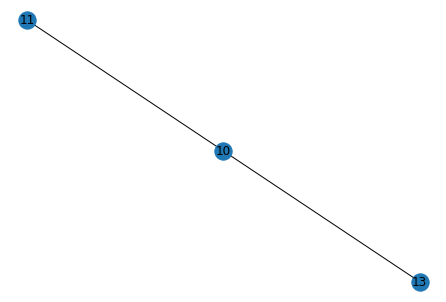

match_branches = []
edges_to_delete (resolve crossover) = [[10, 11], [10, 13], [11, 13]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([10, 11]), array([10, 13]), array([11, 13])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {10}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62}
Comp 2 = {40, 41, 13, 14, 15, 51, 52}
curr_limb_copy.deleted_edges = [array([10, 11]), array([10, 13]), array([11, 13])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([10, 11]), array([10, 13]), array([11, 13])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path 

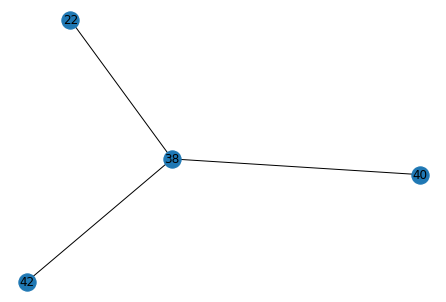

match_branches = []
edges_to_delete (resolve crossover) = [[22, 38], [22, 40], [22, 42], [38, 40], [38, 42], [40, 42]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
Skipping endnode 60 because skeletal distance was 1945.2469314942996 and threshold was 2500
skip_nodes = [60]
edges_to_delete (cut_limb_network) = [[22, 38], [22, 40], [22, 42], [38, 40], [38, 42], [40, 42]]
edges_to_create = []
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28.0, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 44, 45, 46, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}
Comp 1 = {22}
Comp 2 = {64, 66, 5, 7, 40, 43, 47, 48, 23, 56}
Comp 3 = {42}
curr_limb_copy.deleted_edges = [[22, 38], [22, 40], [22, 42], [38, 40], [38, 42], [40, 42]]
curr_limb_copy.created

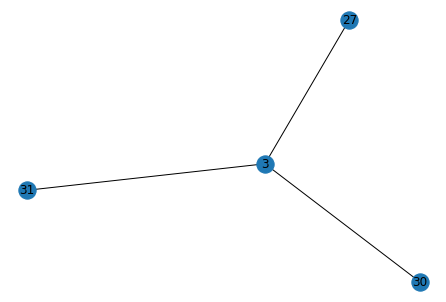

match_branches = [[27, 30], [3, 31]]
edges_to_delete (resolve crossover) = [[3, 27], [3, 30], [27, 31], [30, 31]]
edges_to_create (resolve crossover) = [[27, 30], [3, 31]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 6 because skeletal distance was 427.01493278862216 and threshold was 2500
skip_nodes = [6]
edges_to_delete (cut_limb_network) = [[3, 27], [3, 30], [27, 31], [30, 31]]
edges_to_create = [[27, 30], [3, 31]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13.0, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38}
Comp 1 = {3, 31}
Comp 2 = {29}
Comp 3 = {39}
curr_limb_copy.deleted_edges = [[3, 27], [3, 30], [27, 31], [30, 31]]
curr_limb_copy.created_edges = [[27, 30], [3, 31]]
After get best cut: cut_edges = [[3, 27], [3, 30], [27, 31], [30, 31]], added_edges = [[27, 30], [3, 31]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the 

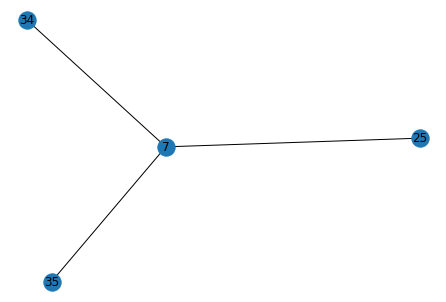

match_branches = [[25, 35], [7, 34]]
edges_to_delete (resolve crossover) = [[7, 25], [7, 35], [25, 34], [34, 35]]
edges_to_create (resolve crossover) = [[25, 35], [7, 34]]
curr_limb.deleted_edges 5 =[[3, 27], [3, 30], [27, 31], [30, 31]]
Skipping endnode 6 because skeletal distance was 427.01493278862216 and threshold was 2500
skip_nodes = [6]
edges_to_delete (cut_limb_network) = [[7, 25], [7, 35], [25, 34], [34, 35]]
edges_to_create = [[25, 35], [7, 34]]
Number of connected components = 5
Comp 0 = {35, 36, 37, 38, 10, 22, 23, 24, 25, 26, 27, 28, 30}
Comp 1 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13.0, 14, 15, 16, 17, 18, 19, 20, 21, 32, 33, 34}
Comp 2 = {3, 31}
Comp 3 = {29}
Comp 4 = {39}
curr_limb_copy.deleted_edges = [[3, 27], [3, 30], [27, 31], [30, 31], [7, 25], [7, 35], [25, 34], [34, 35]]
curr_limb_copy.created_edges = [[27, 30], [3, 31], [25, 35], [7, 34]]
After get best cut: cut_edges = [[7, 25], [7, 35], [25, 34], [34, 35]], added_edges = [[25, 35], [7, 34]]
total_soma_paths_to

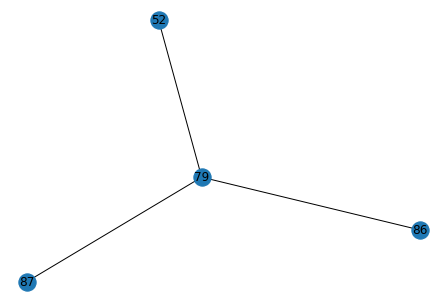

match_branches = [[52, 87], [79, 86]]
edges_to_delete (resolve crossover) = [[52, 79], [52, 86], [79, 87], [86, 87]]
edges_to_create (resolve crossover) = [[52, 87], [79, 86]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 100 because skeletal distance was 487.41343285410557 and threshold was 2500
skip_nodes = [100]
edges_to_delete (cut_limb_network) = [[52, 79], [52, 86], [79, 87], [86, 87]]
edges_to_create = [[52, 87], [79, 86]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,

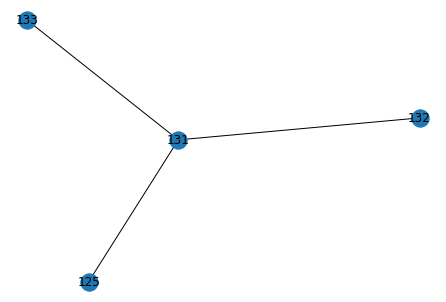

match_branches = [[125, 132]]
edges_to_delete (resolve crossover) = [[125, 131], [125, 133], [131, 132], [131, 133], [132, 133]]
edges_to_create (resolve crossover) = [[125, 132]]
curr_limb.deleted_edges 5 =[[52, 79], [52, 86], [79, 87], [86, 87]]
Skipping endnode 100 because skeletal distance was 487.41343285410557 and threshold was 2500
skip_nodes = [100]
edges_to_delete (cut_limb_network) = [[125, 131], [125, 133], [131, 132], [131, 133], [132, 133]]
edges_to_create = [[125, 132]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 83, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121

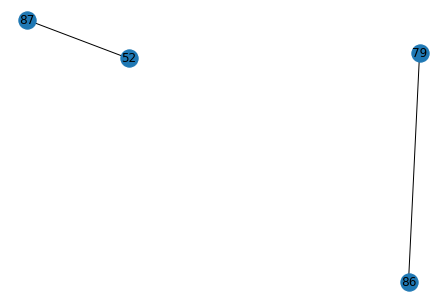

match_branches = [[52, 87], [79, 86]]
edges_to_delete (resolve crossover) = [[52, 79], [52, 86], [79, 87], [86, 87]]
edges_to_create (resolve crossover) = [[52, 87], [79, 86]]
curr_limb.deleted_edges 5 =[[52, 79], [52, 86], [79, 87], [86, 87], [125, 131], [125, 133], [131, 132], [131, 133], [132, 133]]
Skipping endnode 100 because skeletal distance was 487.41343285410557 and threshold was 2500
skip_nodes = [100]
edges_to_delete (cut_limb_network) = [[52, 79], [52, 86], [79, 87], [86, 87]]
edges_to_create = [[52, 87], [79, 86]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 83, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,

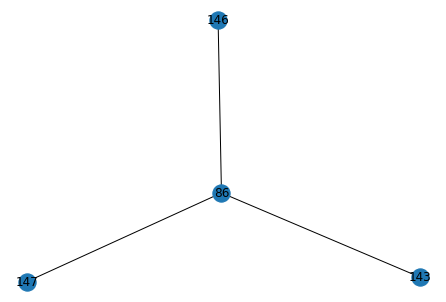

match_branches = [[143, 147], [86, 146]]
edges_to_delete (resolve crossover) = [[86, 143], [86, 147], [143, 146], [146, 147]]
edges_to_create (resolve crossover) = [[143, 147], [86, 146]]
curr_limb.deleted_edges 5 =[[52, 79], [52, 86], [79, 87], [86, 87], [125, 131], [125, 133], [131, 132], [131, 133], [132, 133], [52, 79], [52, 86], [79, 87], [86, 87]]
Skipping endnode 100 because skeletal distance was 487.41343285410557 and threshold was 2500
skip_nodes = [100]
edges_to_delete (cut_limb_network) = [[86, 143], [86, 147], [143, 146], [146, 147]]
edges_to_create = [[143, 147], [86, 146]]
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 78, 79, 80, 83, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 

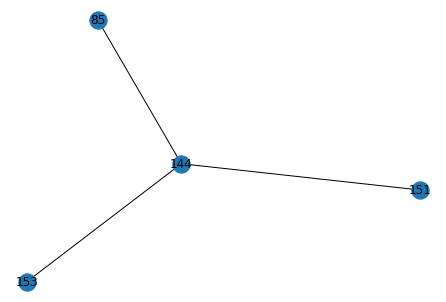

match_branches = [[85, 151]]
edges_to_delete (resolve crossover) = [[85, 144], [85, 153], [144, 151], [144, 153], [151, 153]]
edges_to_create (resolve crossover) = [[85, 151]]
curr_limb.deleted_edges 5 =[[52, 79], [52, 86], [79, 87], [86, 87], [125, 131], [125, 133], [131, 132], [131, 133], [132, 133], [52, 79], [52, 86], [79, 87], [86, 87], [86, 143], [86, 147], [143, 146], [146, 147]]
Skipping endnode 100 because skeletal distance was 487.41343285410557 and threshold was 2500
skip_nodes = [100]
edges_to_delete (cut_limb_network) = [[85, 144], [85, 153], [144, 151], [144, 153], [151, 153]]
edges_to_create = [[85, 151]]
Number of connected components = 7
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 78, 79, 80, 83, 86, 88, 89, 90, 91, 92, 93, 94, 95, 9

  Edge: [33 25]: curr_angle = 38.85
  Edge: [25 28]: curr_angle = 9.35
  Edge: [28 40]: curr_angle = 62.04
  Edge: [40 53]: curr_angle = 19.66
  Edge: [53 63]: curr_angle = 48.21
  Edge: [63 87]: curr_angle = 70.24
  Edge: [87 72]: curr_angle = 52.41
  Edge: [72 64]: curr_angle = 95.64
  Edge: [64 62]: curr_angle = 35.8

Total time for doubling_back = 0.6210348606109619

Attempting the width jump check (attempting from both sides)
  Edge: [33 25]: jump = -677.75
  Edge: [25 28]: jump = 82.88
  Edge: [28 40]: jump = 16.6
  Edge: [40 53]: jump = -59.3
  Edge: [53 63]: jump = 10.88
  Edge: [63 87]: jump = 34.34
  Edge: [87 72]: jump = -124.13
  Edge: [72 64]: jump = 273.36
Adding error edge [72 64] because width jump was 273.3588017475363
  Edge: [64 62]: jump = 121.08
Total time for width = 0.5878076553344727
Path starting at 33 had err_edges: [[72, 64]]
  Edge: [62 64]: jump = -121.08
  Edge: [64 72]: jump = -273.36
  Edge: [72 87]: jump = 124.13
  Edge: [87 63]: jump = -34.34
  Edge: [

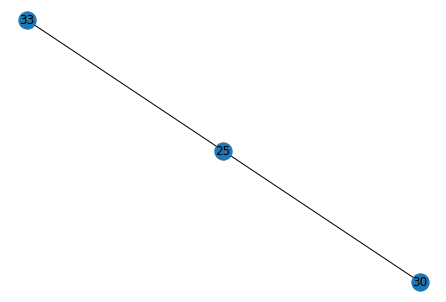

match_branches = [[30, 33]]
edges_to_delete (resolve crossover) = [[25, 30], [25, 33]]
edges_to_create (resolve crossover) = [[30, 33]]
edges_to_delete (cut_limb_network) = [array([25, 30]), array([25, 33])]
edges_to_create = [[30, 33]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23, 24, 25, 26, 28, 29, 32, 34, 35, 38, 39, 40, 41, 42, 43, 44, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142}
Comp 1 = {33, 36, 37, 9, 10, 139, 140, 45, 47, 115, 116, 20, 22, 27, 30, 31}
curr_limb_copy.deleted_edges = [array([25, 30]), array([25, 33])]
curr_limb_copy.created_edges = [[30, 

  Edge: [49 54]: curr_angle = 36.74
  Edge: [54 82]: curr_angle = 64.35
  Edge: [82 80]: curr_angle = 33.52
  Edge: [80 69]: curr_angle = 21.87
  Edge: [69 66]: curr_angle = 28.54
  Edge: [66 59]: curr_angle = 21.66

Total time for doubling_back = 0.562014102935791

Attempting the width jump check (attempting from both sides)
  Edge: [49 54]: jump = -318.05
  Edge: [54 82]: jump = -19.77
  Edge: [82 80]: jump = 291.13
Adding error edge [82 80] because width jump was 291.128600436129
  Edge: [80 69]: jump = 106.83
  Edge: [69 66]: jump = 144.12
  Edge: [66 59]: jump = 134.2
Total time for width = 0.5343124866485596
Path starting at 49 had err_edges: [[82, 80]]
  Edge: [59 66]: jump = -134.2
  Edge: [66 69]: jump = -144.12
  Edge: [69 80]: jump = -106.83
  Edge: [80 82]: jump = -291.13
  Edge: [82 54]: jump = 19.77
  Edge: [54 49]: jump = 318.05
Adding error edge [54 49] because width jump was 318.0527680094584
Total time for width = 0.5389058589935303
Path starting at 59 had err_edges: 

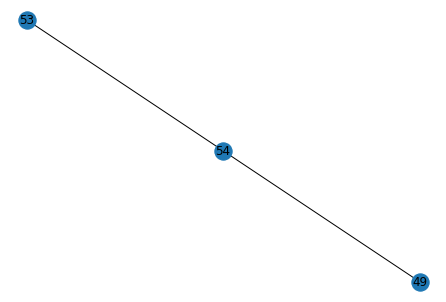

match_branches = [[49, 54]]
edges_to_delete (resolve crossover) = [[49, 53], [53, 54]]
edges_to_create (resolve crossover) = [[49, 54]]
Rejecting creating edge [49, 54] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([49, 53]), array([49, 54]), array([53, 54])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {49}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 70, 71, 72, 73, 74, 75, 76, 77, 78, 84, 85, 86, 87, 88}
Comp 2 = {66, 67, 68, 69, 79, 80, 81, 82, 83, 54, 59}
curr_limb_copy.deleted_edges = [array([49, 53]), array([49, 54]), array([53, 54])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([49, 53]), array([49, 54]), array([53, 54])], added_edges = []
total_soma_paths_to_cut = []
------

  Edge: [16 18]: curr_angle = 59.0
  Edge: [18 20]: curr_angle = 137.68
  Edge: [20 24]: curr_angle = 139.82
  Edge: [24 23]: curr_angle = 176.85
  Edge: [23 25]: curr_angle = 31.23
  Edge: [25 26]: curr_angle = 173.41

Total time for doubling_back = 0.1482563018798828
There were 4 edges that passed doubling back threshold of 100
Winning edge [24 23] had a doubling back of 176.84615951119028
***inside resolve crossover!!!!****
coordinate_branches = [2, 23, 24]
2 = red
23 = aqua
24 = purple
Angle between 2 and 23 = 61.74 
Angle between 2 and 24 = 73.92 
Angle between 23 and 24 = 51.02 
Final Matches = []
matched_branches_revised = []
Original graph


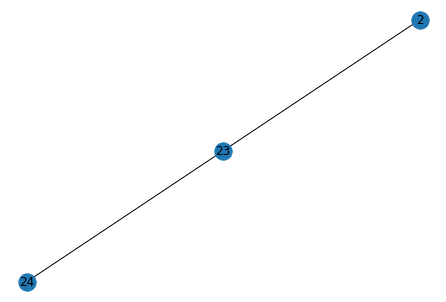

match_branches = []
edges_to_delete (resolve crossover) = [[2, 23], [2, 24], [23, 24]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([ 2, 23]), array([ 2, 24]), array([23, 24])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 24, 28, 29, 30}
Comp 1 = {2}
Comp 2 = {7, 13, 19, 23, 25, 26, 27}
curr_limb_copy.deleted_edges = [array([ 2, 23]), array([ 2, 24]), array([23, 24])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([ 2, 23]), array([ 2, 24]), array([23, 24])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([ 0,  1,  3,  4,  5,  6,  8,  9, 10,

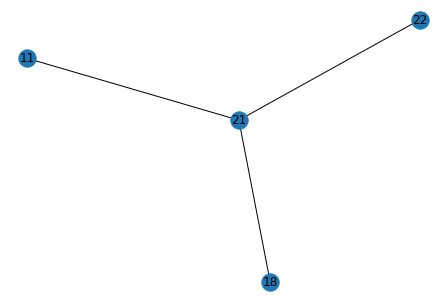

match_branches = [[18, 21], [11, 22]]
edges_to_delete (resolve crossover) = [[11, 18], [11, 21], [18, 22], [21, 22]]
edges_to_create (resolve crossover) = [[18, 21], [11, 22]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[11, 18], [11, 21], [18, 22], [21, 22]]
edges_to_create = [[18, 21], [11, 22]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60}
Comp 1 = {20}
Comp 2 = {48}
curr_limb_copy.deleted_edges = [[11, 18], [11, 21], [18, 22], [21, 22]]
curr_limb_copy.created_edges = [[18, 21], [11, 22]]
After get best cut: cut_edges = [[11, 18], [11, 21], [18, 22], [21, 22]], added_edges = [[18, 21], [11, 22]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split B

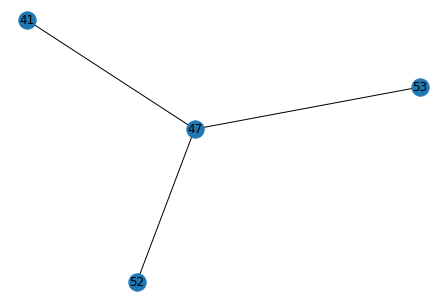

match_branches = [[41, 53]]
edges_to_delete (resolve crossover) = [[41, 47], [41, 52], [47, 52], [47, 53], [52, 53]]
edges_to_create (resolve crossover) = [[41, 53]]
curr_limb.deleted_edges 5 =[[11, 18], [11, 21], [18, 22], [21, 22]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[41, 47], [41, 52], [47, 52], [47, 53], [52, 53]]
edges_to_create = [[41, 53]]
Number of connected components = 6
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 49, 50, 51, 55, 56, 57, 58, 59, 60}
Comp 1 = {41, 53}
Comp 2 = {52}
Comp 3 = {20}
Comp 4 = {48}
Comp 5 = {54}
curr_limb_copy.deleted_edges = [[11, 18], [11, 21], [18, 22], [21, 22], [41, 47], [41, 52], [47, 52], [47, 53], [52, 53]]
curr_limb_copy.created_edges = [[18, 21], [11, 22], [41, 53]]
After get best cut: cut_edges = [[41, 47], [41, 52], [47, 52], [47, 53], [52, 53]], added_edges = [[41, 53]]
total_soma_

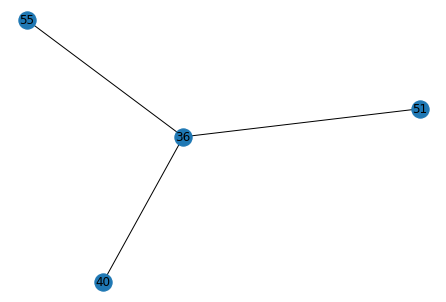

match_branches = [[36, 55]]
edges_to_delete (resolve crossover) = [[36, 40], [36, 51], [40, 51], [40, 55], [51, 55]]
edges_to_create (resolve crossover) = [[36, 55]]
curr_limb.deleted_edges 5 =[[11, 18], [11, 21], [18, 22], [21, 22], [41, 47], [41, 52], [47, 52], [47, 53], [52, 53]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[36, 40], [36, 51], [40, 51], [40, 55], [51, 55]]
edges_to_create = [[36, 55]]
Number of connected components = 8
Comp 0 = {3, 8, 11, 12, 13, 22, 27, 28, 35, 39, 40, 42, 43, 44, 45, 46, 47, 49, 50, 56, 57, 58, 59, 60}
Comp 1 = {0, 1, 2, 4, 5, 6, 7, 9, 10, 14, 15, 16, 17, 18, 19, 21, 23, 24, 25, 26, 29, 30, 31, 32, 33, 34, 36, 37, 38, 55}
Comp 2 = {51}
Comp 3 = {41, 53}
Comp 4 = {52}
Comp 5 = {20}
Comp 6 = {48}
Comp 7 = {54}
curr_limb_copy.deleted_edges = [[11, 18], [11, 21], [18, 22], [21, 22], [41, 47], [41, 52], [47, 52], [47, 53], [52, 53], [36, 40], [36, 51], [40, 51], [40, 55], [51, 55]]
curr_limb_copy.created_edges = [[18, 21], [11, 22], [41, 53], 

  Edge: [18 13]: curr_angle = 18.58
  Edge: [13  9]: curr_angle = 21.21
  Edge: [9 5]: curr_angle = 40.69
  Edge: [5 4]: curr_angle = 127.81
  Edge: [4 6]: curr_angle = 135.12
  Edge: [ 6 15]: curr_angle = 19.49
  Edge: [15 16]: curr_angle = 52.9
  Edge: [16 23]: curr_angle = 44.46

Total time for doubling_back = 0.4756453037261963
There were 2 edges that passed doubling back threshold of 100
Winning edge [4 6] had a doubling back of 135.11848290613614
***inside resolve crossover!!!!****
coordinate_branches = [1, 4, 6]
1 = red
4 = aqua
6 = purple
Angle between 1 and 4 = 144.55 
Angle between 1 and 6 = 24.74 
Angle between 4 and 6 = 58.7 
Final Matches = [[1, 6]]
matched_branches_revised = [[1, 6]]
Original graph


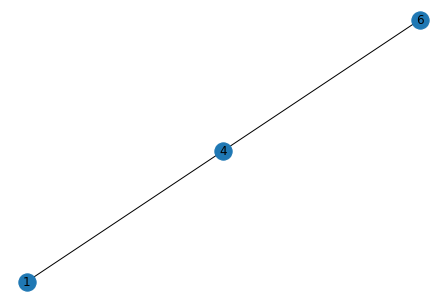

match_branches = [[1, 6]]
edges_to_delete (resolve crossover) = [[1, 4], [4, 6]]
edges_to_create (resolve crossover) = [[1, 6]]
edges_to_delete (cut_limb_network) = [array([1, 4]), array([4, 6])]
edges_to_create = [[1, 6]]
Number of connected components = 2
Comp 0 = {1, 3, 6, 8, 10, 15, 16, 19, 20, 21, 22, 23}
Comp 1 = {0, 2, 4, 5, 7, 9, 11, 12, 13, 14, 17, 18, 24}
curr_limb_copy.deleted_edges = [array([1, 4]), array([4, 6])]
curr_limb_copy.created_edges = [[1, 6]]
After get best cut: cut_edges = [array([1, 4]), array([4, 6])], added_edges = [[1, 6]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection


---- working on disconnecting 18 and 24
---- This disconnects S1_1 from S1_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total 

  Edge: [18 13]: curr_angle = 18.58
  Edge: [13 12]: curr_angle = 160.71
  Edge: [12 24]: curr_angle = 43.74

Total time for doubling_back = 0.2259368896484375
There were 1 edges that passed doubling back threshold of 100
Winning edge [13 12] had a doubling back of 160.70707689507
***inside resolve crossover!!!!****
coordinate_branches = [9, 12, 13]
9 = red
12 = aqua
13 = purple
Angle between 9 and 12 = 85.91 
Angle between 9 and 13 = 9.61 
Angle between 12 and 13 = 98.41 
Final Matches = [[9, 13]]
matched_branches_revised = [[9, 13]]
Original graph


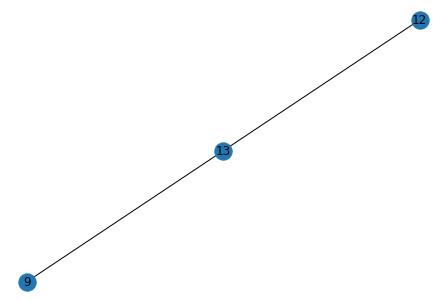

match_branches = [[9, 13]]
edges_to_delete (resolve crossover) = [[9, 12], [12, 13]]
edges_to_create (resolve crossover) = [[9, 13]]
edges_to_delete (cut_limb_network) = [array([ 9, 12]), array([12, 13])]
edges_to_create = [[9, 13]]
Number of connected components = 3
Comp 0 = {1, 3, 6, 8, 10, 15, 16, 19, 20, 21, 22, 23}
Comp 1 = {0, 2, 4, 5, 7, 9, 13, 18}
Comp 2 = {11, 12, 14, 17, 24}
curr_limb_copy.deleted_edges = [array([1, 4]), array([4, 6]), array([ 9, 12]), array([12, 13])]
curr_limb_copy.created_edges = [[1, 6], [9, 13]]
After get best cut: cut_edges = [array([ 9, 12]), array([12, 13])], added_edges = [[9, 13]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection


---- working on disconnecting 23 and 24
---- This disconnects S0_0 from S1_0  
 Cut iteration 0
Total nu

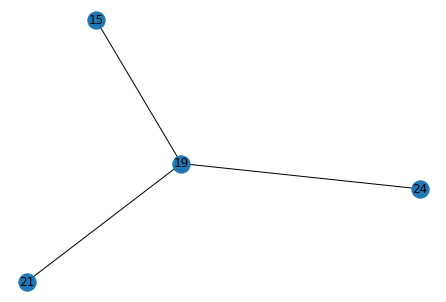

match_branches = [[15, 19], [21, 24]]
edges_to_delete (resolve crossover) = [[15, 21], [15, 24], [19, 21], [19, 24]]
edges_to_create (resolve crossover) = [[15, 19], [21, 24]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[15, 21], [15, 24], [19, 21], [19, 24]]
edges_to_create = [[15, 19], [21, 24]]
Number of connected components = 1
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52}
curr_limb_copy.deleted_edges = [[15, 21], [15, 24], [19, 21], [19, 24]]
curr_limb_copy.created_edges = [[15, 19], [21, 24]]
After get best cut: cut_edges = [[15, 21], [15, 24], [19, 21], [19, 24]], added_edges = [[15, 19], [21, 24]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the 

  Edge: [ 9 10]: curr_angle = 32.36
  Edge: [10 12]: curr_angle = 4.14
  Edge: [12 19]: curr_angle = 80.49
  Edge: [19 15]: curr_angle = 4.46
  Edge: [15 16]: curr_angle = 41.53
  Edge: [16 23]: curr_angle = 116.8
  Edge: [23 44]: curr_angle = 36.54
  Edge: [44 37]: curr_angle = 43.64
  Edge: [37 39]: curr_angle = 20.68
  Edge: [39 38]: curr_angle = 110.0
  Edge: [38 47]: curr_angle = 24.71
  Edge: [47 49]: curr_angle = 146.39
  Edge: [49 43]: curr_angle = 144.51
  Edge: [43 35]: curr_angle = 27.66
  Edge: [35 28]: curr_angle = 40.9

Total time for doubling_back = 0.5375940799713135
There were 4 edges that passed doubling back threshold of 100
Winning edge [47 49] had a doubling back of 146.38814052164648
***inside resolve crossover!!!!****
coordinate_branches = [47, 48, 49]
47 = red
48 = aqua
49 = purple
Angle between 47 and 48 = 26.0 
Angle between 47 and 49 = 133.31 
Angle between 48 and 49 = 39.62 
Final Matches = [[47, 48]]
matched_branches_revised = [[47, 48]]
Original graph


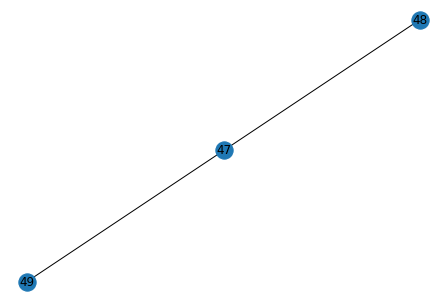

match_branches = [[47, 48]]
edges_to_delete (resolve crossover) = [[47, 49], [48, 49]]
edges_to_create (resolve crossover) = [[47, 48]]
edges_to_delete (cut_limb_network) = [array([47, 49]), array([48, 49])]
edges_to_create = [[47, 48]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 29, 30, 31, 32, 33, 34, 37, 38, 39, 41, 44, 46, 47, 48, 51, 52}
Comp 1 = {35, 36, 7, 40, 42, 43, 45, 49, 50, 27, 28}
curr_limb_copy.deleted_edges = [[15, 21], [15, 24], [19, 21], [19, 24], array([47, 49]), array([48, 49])]
curr_limb_copy.created_edges = [[15, 19], [21, 24], [47, 48]]
After get best cut: cut_edges = [array([47, 49]), array([48, 49])], added_edges = [[47, 48]]
total_soma_paths_to_cut = [[15, 21], [15, 24], [19, 21], [19, 24]]
-----------counter = 1------------
 Cut iteration 2
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIR

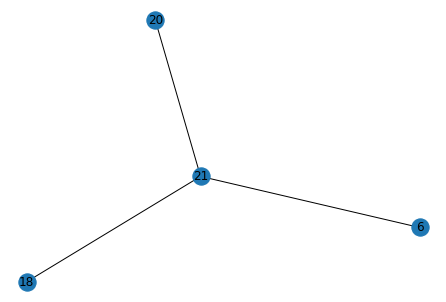

match_branches = [[6, 18]]
edges_to_delete (resolve crossover) = [[6, 20], [6, 21], [18, 20], [18, 21], [20, 21]]
edges_to_create (resolve crossover) = [[6, 18]]
curr_limb.deleted_edges 5 =[[15, 21], [15, 24], [19, 21], [19, 24], array([47, 49]), array([48, 49])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[6, 20], [6, 21], [18, 20], [18, 21], [20, 21]]
edges_to_create = [[6, 18]]
Number of connected components = 5
Comp 0 = {1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 23, 33, 34, 37, 38, 39, 41, 44, 46, 47, 48}
Comp 1 = {32, 0, 13, 51, 52, 21, 24, 25, 26, 29, 30, 31}
Comp 2 = {20}
Comp 3 = {35, 36, 7, 40, 42, 43, 45, 49, 50, 27, 28}
Comp 4 = {22}
curr_limb_copy.deleted_edges = [[15, 21], [15, 24], [19, 21], [19, 24], array([47, 49]), array([48, 49]), [6, 20], [6, 21], [18, 20], [18, 21], [20, 21]]
curr_limb_copy.created_edges = [[15, 19], [21, 24], [47, 48], [6, 18]]
After get best cut: cut_edges = [[6, 20], [6, 21], [18, 20], [18, 21], [20, 21]], added_edges 

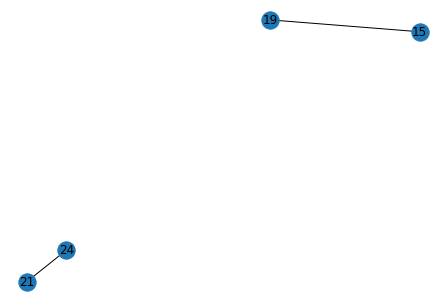

match_branches = [[15, 19], [21, 24]]
edges_to_delete (resolve crossover) = [[15, 21], [15, 24], [19, 21], [19, 24]]
edges_to_create (resolve crossover) = [[15, 19], [21, 24]]
curr_limb.deleted_edges 5 =[[15, 21], [15, 24], [19, 21], [19, 24], array([47, 49]), array([48, 49]), [6, 20], [6, 21], [18, 20], [18, 21], [20, 21]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[15, 21], [15, 24], [19, 21], [19, 24]]
edges_to_create = [[15, 19], [21, 24]]
Number of connected components = 5
Comp 0 = {1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 23, 33, 34, 37, 38, 39, 41, 44, 46, 47, 48}
Comp 1 = {32, 0, 13, 51, 52, 21, 24, 25, 26, 29, 30, 31}
Comp 2 = {20}
Comp 3 = {35, 36, 7, 40, 42, 43, 45, 49, 50, 27, 28}
Comp 4 = {22}
curr_limb_copy.deleted_edges = [[15, 21], [15, 24], [19, 21], [19, 24], array([47, 49]), array([48, 49]), [6, 20], [6, 21], [18, 20], [18, 21], [20, 21], [15, 21], [15, 24], [19, 21], [19, 24]]
curr_limb_copy.created_edges = [[15, 19], [21, 24], [47, 48]

  Edge: [ 9 10]: curr_angle = 32.36
  Edge: [10 12]: curr_angle = 4.14
  Edge: [12 19]: curr_angle = 80.49
  Edge: [19 15]: curr_angle = 4.46
  Edge: [15 16]: curr_angle = 41.53
  Edge: [16 23]: curr_angle = 116.8
  Edge: [23 44]: curr_angle = 36.54
  Edge: [44 37]: curr_angle = 43.64
  Edge: [37 39]: curr_angle = 20.68
  Edge: [39 33]: curr_angle = 29.78

Total time for doubling_back = 0.39096665382385254
There were 1 edges that passed doubling back threshold of 100
Winning edge [16 23] had a doubling back of 116.7972129257797
***inside resolve crossover!!!!****
coordinate_branches = [16, 18, 23]
16 = red
18 = aqua
23 = purple
Angle between 16 and 18 = 105.72 
Angle between 16 and 23 = 85.69 
Angle between 18 and 23 = 11.47 
Final Matches = [[18, 23]]
matched_branches_revised = [[18, 23]]
Original graph


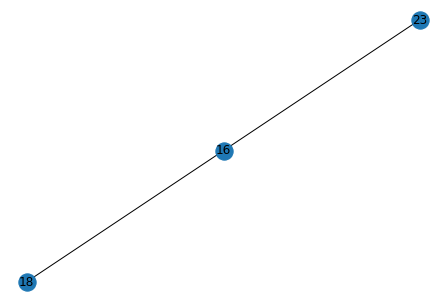

match_branches = [[18, 23]]
edges_to_delete (resolve crossover) = [[16, 18], [16, 23]]
edges_to_create (resolve crossover) = [[18, 23]]
edges_to_delete (cut_limb_network) = [array([16, 18]), array([16, 23])]
edges_to_create = [[18, 23]]
Number of connected components = 6
Comp 0 = {1, 2, 4, 5, 8, 9, 10, 11, 12, 14, 15, 16, 17, 19}
Comp 1 = {32, 0, 13, 51, 52, 21, 24, 25, 26, 29, 30, 31}
Comp 2 = {33, 34, 3, 37, 6, 39, 38, 41, 44, 46, 47, 48, 18, 23}
Comp 3 = {20}
Comp 4 = {35, 36, 7, 40, 42, 43, 45, 49, 50, 27, 28}
Comp 5 = {22}
curr_limb_copy.deleted_edges = [[15, 21], [15, 24], [19, 21], [19, 24], array([47, 49]), array([48, 49]), [6, 20], [6, 21], [18, 20], [18, 21], [20, 21], [15, 21], [15, 24], [19, 21], [19, 24], array([16, 18]), array([16, 23])]
curr_limb_copy.created_edges = [[15, 19], [21, 24], [47, 48], [6, 18], [15, 19], [21, 24], [18, 23]]
After get best cut: cut_edges = [array([16, 18]), array([16, 23])], added_edges = [[18, 23]]
total_soma_paths_to_cut = [[15, 21], [15, 24

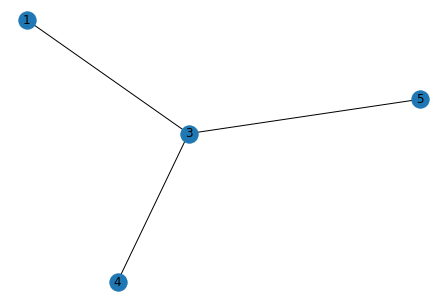

match_branches = [[1, 5], [3, 4]]
edges_to_delete (resolve crossover) = [[1, 3], [1, 4], [3, 5], [4, 5]]
edges_to_create (resolve crossover) = [[1, 5], [3, 4]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[1, 3], [1, 4], [3, 5], [4, 5]]
edges_to_create = [[1, 5], [3, 4]]
Number of connected components = 2
Comp 0 = {0, 2, 3, 4, 6, 7}
Comp 1 = {1, 5, 8, 9, 10, 11, 12, 13}
curr_limb_copy.deleted_edges = [[1, 3], [1, 4], [3, 5], [4, 5]]
curr_limb_copy.created_edges = [[1, 5], [3, 4]]
After get best cut: cut_edges = [[1, 3], [1, 4], [3, 5], [4, 5]], added_edges = [[1, 5], [3, 4]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([0, 2, 3, 4, 6, 7]), array([ 1,  5,  8,  9, 10, 11,

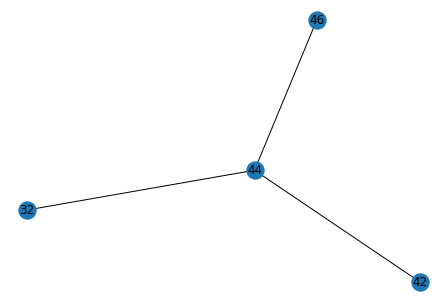

match_branches = [[32, 42]]
edges_to_delete (resolve crossover) = [[32, 44], [32, 46], [42, 44], [42, 46], [44, 46]]
edges_to_create (resolve crossover) = [[32, 42]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 31 because skeletal distance was 545.619990940424 and threshold was 2500
skip_nodes = [31]
edges_to_delete (cut_limb_network) = [[32, 44], [32, 46], [42, 44], [42, 46], [44, 46]]
edges_to_create = [[32, 42]]
Number of connected components = 3
Comp 0 = {0, 33, 34, 1, 4, 37, 38, 32, 8, 9, 42, 49, 19, 53, 29, 31}
Comp 1 = {2, 3, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 35, 36, 39, 40, 41, 43, 44, 45, 47, 48, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60}
Comp 2 = {46}
curr_limb_copy.deleted_edges = [[32, 44], [32, 46], [42, 44], [42, 46], [44, 46]]
curr_limb_copy.created_edges = [[32, 42]]
After get best cut: cut_edges = [[32, 44], [32, 46], [42, 44], [42, 46], [44, 46]], added_edges = [[32, 42]]
total_soma_paths_to_cut = []
-----------counter

  Edge: [32 42]: curr_angle = 13.65
No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [42 37]: curr_angle = 33.13
  Edge: [37 34]: curr_angle = 20.64
  Edge: [34 33]: curr_angle = 27.74

Total time for doubling_back = 0.1099236011505127

Attempting the width jump check (attempting from both sides)
  Edge: [32 42]: jump = 19.53
No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [42 37]: jump = 133.17
  Edge: [37 34]: jump = 374.94
Adding error edge [37 34] because width jump was 374.9445716206451
  Edge: [34 33]: jump = -75.69
Total time for width = 0.0881037712097168
Path starting at 31 had err_edges: [[37, 34]]
  Edge: [33 34]: jump = 75.69
  Edge: [34 37]: jump = -374.94
  Edge: [37 42]: jump = -133.17
  Edge: [42 32]: jump = -109.87
Total time for width = 0.09275484085083008
Path starting at 33 had err_edges: []
first_error_sizes = [374.9445716206451, -inf], winning_path = 0
***inside resolve crossove

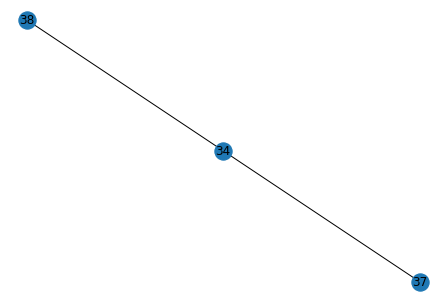

match_branches = [[34, 37]]
edges_to_delete (resolve crossover) = [[34, 38], [37, 38]]
edges_to_create (resolve crossover) = [[34, 37]]
Rejecting creating edge [34, 37] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([34, 37]), array([34, 38]), array([37, 38])]
edges_to_create = []
Number of connected components = 5
Comp 0 = {0, 33, 34, 1, 4, 8, 9}
Comp 1 = {32, 37, 42, 49, 19, 53, 29, 31}
Comp 2 = {38}
Comp 3 = {2, 3, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 35, 36, 39, 40, 41, 43, 44, 45, 47, 48, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60}
Comp 4 = {46}
curr_limb_copy.deleted_edges = [[32, 44], [32, 46], [42, 44], [42, 46], [44, 46], array([34, 37]), array([34, 38]), array([37, 38])]
curr_limb_copy.created_edges = [[32, 42]]
After get best cut: cut_edges = [array([34, 37]), array([34, 38]), array([37, 38])], added_edges = []
total_soma_paths_to_cut = [[32, 44], [32, 46], [42, 44], [42, 46], [4

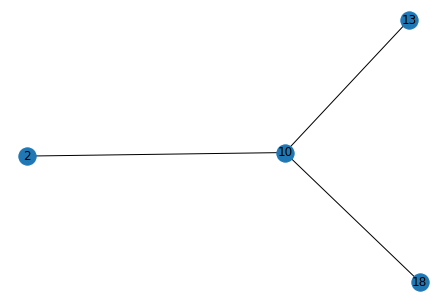

match_branches = [[13, 18]]
edges_to_delete (resolve crossover) = [[2, 10], [2, 13], [2, 18], [10, 13], [10, 18]]
edges_to_create (resolve crossover) = [[13, 18]]
curr_limb.deleted_edges 5 =[[32, 44], [32, 46], [42, 44], [42, 46], [44, 46], array([34, 37]), array([34, 38]), array([37, 38])]
Skipping endnode 52 because skeletal distance was 2323.0263589139477 and threshold was 2500
skip_nodes = [52]
edges_to_delete (cut_limb_network) = [[2, 10], [2, 13], [2, 18], [10, 13], [10, 18]]
edges_to_create = [[13, 18]]
Number of connected components = 8
Comp 0 = {0, 33, 34, 1, 4, 8, 9}
Comp 1 = {32, 37, 42, 49, 19, 53, 29, 31}
Comp 2 = {38}
Comp 3 = {3, 5, 7, 10, 11, 12, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 35, 36, 40, 41, 43, 44, 45, 47, 51, 57, 58, 59, 60}
Comp 4 = {46}
Comp 5 = {2}
Comp 6 = {6, 39, 13, 15, 48, 18, 50, 52, 54, 55, 56, 30}
Comp 7 = {14}
curr_limb_copy.deleted_edges = [[32, 44], [32, 46], [42, 44], [42, 46], [44, 46], array([34, 37]), array([34, 38]), array([37, 38]), [2

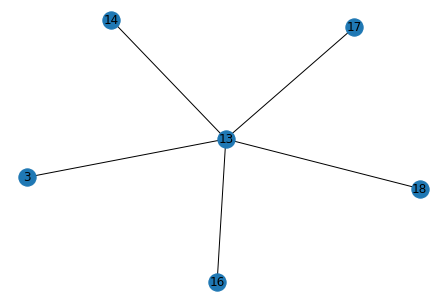

match_branches = [[3, 17]]
edges_to_delete (resolve crossover) = [[3, 13], [3, 14], [3, 16], [3, 18], [13, 14], [13, 16], [13, 17], [13, 18], [14, 16], [14, 17], [14, 18], [16, 17], [16, 18], [17, 18]]
edges_to_create (resolve crossover) = [[3, 17]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 13 because skeletal distance was 1739.6619038759652 and threshold was 2500
Skipping endnode 16 because skeletal distance was 1646.9510450360126 and threshold was 2500
Could not used the revised endnodes path because empty
skip_nodes = []
edges_to_delete (cut_limb_network) = [[3, 13], [3, 14], [3, 16], [3, 18], [13, 14], [13, 16], [13, 17], [13, 18], [14, 16], [14, 17], [14, 18], [16, 17], [16, 18], [17, 18]]
edges_to_create = [[3, 17]]
Number of connected components = 6
Comp 0 = {16}
Comp 1 = {0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 17, 20, 21, 22, 23, 24, 25, 29, 31, 36, 38, 39, 41, 42, 43, 44, 45, 46, 48, 50, 51, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 7

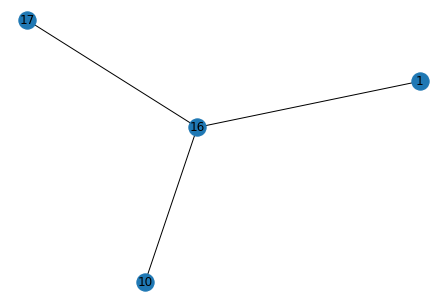

match_branches = [[1, 16], [10, 17]]
edges_to_delete (resolve crossover) = [[1, 10], [1, 17], [10, 16], [16, 17]]
edges_to_create (resolve crossover) = [[1, 16], [10, 17]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[1, 10], [1, 17], [10, 16], [16, 17]]
edges_to_create = [[1, 16], [10, 17]]
Number of connected components = 2
Comp 0 = {1, 3, 8, 11, 12, 13, 14, 15, 16, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}
Comp 1 = {0, 2, 4, 5, 6, 7, 9, 10, 17, 18, 19, 20, 21, 22, 25, 26}
curr_limb_copy.deleted_edges = [[1, 10], [1, 17], [10, 16], [16, 17]]
curr_limb_copy.created_edges = [[1, 16], [10, 17]]
After get best cut: cut_edges = [[1, 10], [1, 17], [10, 16], [16, 17]], added_edges = [[1, 16], [10, 17]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so

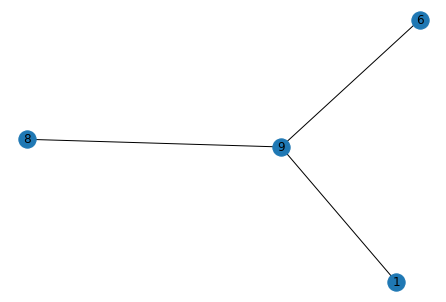

match_branches = [[1, 8], [6, 9]]
edges_to_delete (resolve crossover) = [[1, 6], [1, 9], [6, 8], [8, 9]]
edges_to_create (resolve crossover) = [[1, 8], [6, 9]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[1, 6], [1, 9], [6, 8], [8, 9]]
edges_to_create = [[1, 8], [6, 9]]
Number of connected components = 2
Comp 0 = {8, 1, 10, 7}
Comp 1 = {0, 2, 3, 4, 5, 6, 9, 11}
curr_limb_copy.deleted_edges = [[1, 6], [1, 9], [6, 8], [8, 9]]
curr_limb_copy.created_edges = [[1, 8], [6, 9]]
After get best cut: cut_edges = [[1, 6], [1, 9], [6, 8], [8, 9]], added_edges = [[1, 8], [6, 9]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 8,  1, 10,  7]), array([ 0,  2,  3,  4,  5,  6,  9, 11])]

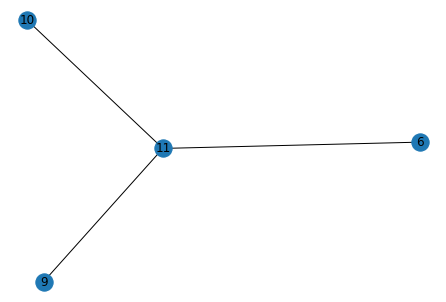

match_branches = [[9, 10]]
edges_to_delete (resolve crossover) = [[6, 9], [6, 10], [6, 11], [9, 11], [10, 11]]
edges_to_create (resolve crossover) = [[9, 10]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 17 because skeletal distance was 466.2023702698497 and threshold was 2500
skip_nodes = [17]
edges_to_delete (cut_limb_network) = [[6, 9], [6, 10], [6, 11], [9, 11], [10, 11]]
edges_to_create = [[9, 10]]
Number of connected components = 3
Comp 0 = {16, 11, 15}
Comp 1 = {6}
Comp 2 = {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13, 14, 17}
curr_limb_copy.deleted_edges = [[6, 9], [6, 10], [6, 11], [9, 11], [10, 11]]
curr_limb_copy.created_edges = [[9, 10]]
After get best cut: cut_edges = [[6, 9], [6, 10], [6, 11], [9, 11], [10, 11]], added_edges = [[9, 10]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving

  Edge: [9 6]: curr_angle = 39.84
  Edge: [6 4]: curr_angle = 79.64
  Edge: [4 5]: curr_angle = 105.15
  Edge: [5 7]: curr_angle = 49.5
  Edge: [ 7 10]: curr_angle = 159.51

Total time for doubling_back = 0.26302123069763184
There were 2 edges that passed doubling back threshold of 100
Winning edge [ 7 10] had a doubling back of 159.50976055972907
***inside resolve crossover!!!!****
coordinate_branches = [3, 7, 10]
3 = red
7 = aqua
10 = purple
Angle between 3 and 7 = 122.04 
Angle between 3 and 10 = 29.08 
Angle between 7 and 10 = 31.33 
Final Matches = [[3, 10], [7, 10]]
matched_branches_revised = [[3, 10]]
Original graph


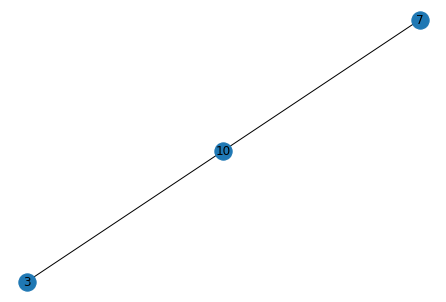

match_branches = [[3, 10]]
edges_to_delete (resolve crossover) = [[3, 7], [7, 10]]
edges_to_create (resolve crossover) = [[3, 10]]
edges_to_delete (cut_limb_network) = [array([3, 7]), array([ 7, 10])]
edges_to_create = [[3, 10]]
Number of connected components = 2
Comp 0 = {10, 3}
Comp 1 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12}
curr_limb_copy.deleted_edges = [array([3, 7]), array([ 7, 10])]
curr_limb_copy.created_edges = [[3, 10]]
After get best cut: cut_edges = [array([3, 7]), array([ 7, 10])], added_edges = [[3, 10]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([10,  3]), array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 11, 12])]


 ------ Total time for Splitting 864691135385207893 = 46.41900134086609 ------


----

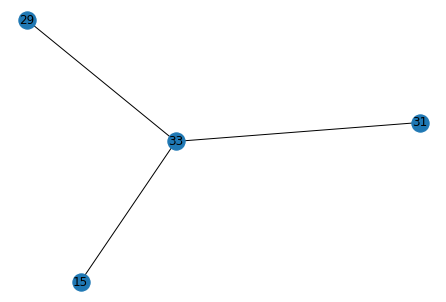

match_branches = [[15, 33], [29, 31]]
edges_to_delete (resolve crossover) = [[15, 29], [15, 31], [29, 33], [31, 33]]
edges_to_create (resolve crossover) = [[15, 33], [29, 31]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[15, 29], [15, 31], [29, 33], [31, 33]]
edges_to_create = [[15, 33], [29, 31]]
Number of connected components = 2
Comp 0 = {0, 6, 7, 18, 19, 21, 23, 24, 27, 29, 30, 31, 32, 34, 35, 37, 38, 39, 42, 44, 45, 46, 48, 51, 52, 54, 60, 61, 62, 63}
Comp 1 = {1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 22, 25, 26, 28, 33, 36, 40, 41, 43, 47, 49, 50, 53, 55, 56, 57, 58, 59}
curr_limb_copy.deleted_edges = [[15, 29], [15, 31], [29, 33], [31, 33]]
curr_limb_copy.created_edges = [[15, 33], [29, 31]]
After get best cut: cut_edges = [[15, 29], [15, 31], [29, 33], [31, 33]], added_edges = [[15, 33], [29, 31]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split

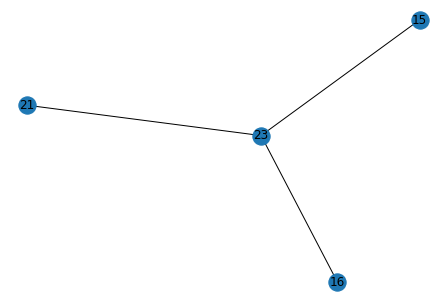

match_branches = [[16, 23]]
edges_to_delete (resolve crossover) = [[15, 16], [15, 21], [15, 23], [16, 21], [21, 23]]
edges_to_create (resolve crossover) = [[16, 23]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[15, 16], [15, 21], [15, 23], [16, 21], [21, 23]]
edges_to_create = [[16, 23]]
Number of connected components = 3
Comp 0 = {1, 21, 30}
Comp 1 = {0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36}
Comp 2 = {20}
curr_limb_copy.deleted_edges = [[15, 16], [15, 21], [15, 23], [16, 21], [21, 23]]
curr_limb_copy.created_edges = [[16, 23]]
After get best cut: cut_edges = [[15, 16], [15, 21], [15, 23], [16, 21], [21, 23]], added_edges = [[16, 23]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path s

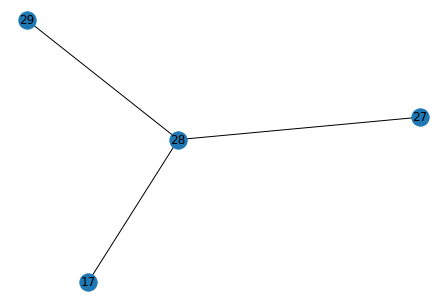

match_branches = [[17, 29], [27, 28]]
edges_to_delete (resolve crossover) = [[17, 27], [17, 28], [27, 29], [28, 29]]
edges_to_create (resolve crossover) = [[17, 29], [27, 28]]
curr_limb.deleted_edges 5 =[[15, 16], [15, 21], [15, 23], [16, 21], [21, 23]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[17, 27], [17, 28], [27, 29], [28, 29]]
edges_to_create = [[17, 29], [27, 28]]
Number of connected components = 4
Comp 0 = {1, 21, 30}
Comp 1 = {6, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19, 22, 23, 24, 25, 26, 27, 28, 31, 35, 36}
Comp 2 = {0, 33, 2, 34, 3, 32, 4, 5, 7, 13, 17, 29}
Comp 3 = {20}
curr_limb_copy.deleted_edges = [[15, 16], [15, 21], [15, 23], [16, 21], [21, 23], [17, 27], [17, 28], [27, 29], [28, 29]]
curr_limb_copy.created_edges = [[16, 23], [17, 29], [27, 28]]
After get best cut: cut_edges = [[17, 27], [17, 28], [27, 29], [28, 29]], added_edges = [[17, 29], [27, 28]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at 

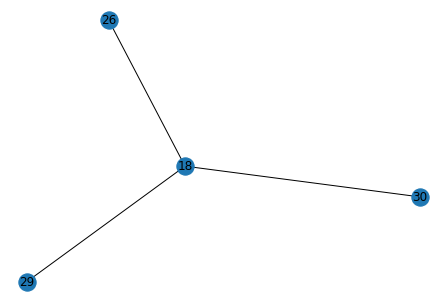

match_branches = [[18, 29]]
edges_to_delete (resolve crossover) = [[18, 26], [18, 30], [26, 29], [26, 30], [29, 30]]
edges_to_create (resolve crossover) = [[18, 29]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 15 because skeletal distance was 634.7531351464462 and threshold was 2500
skip_nodes = [15]
edges_to_delete (cut_limb_network) = [[18, 26], [18, 30], [26, 29], [26, 30], [29, 30]]
edges_to_create = [[18, 29]]
Number of connected components = 4
Comp 0 = {0, 1, 3, 4, 5, 8, 9, 10, 11, 19, 21, 22, 23, 25, 28, 30, 31, 32, 33, 34, 35, 37, 39, 40, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88.0, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143

  Edge: [29 31]: curr_angle = 8.85
  Edge: [31 32]: curr_angle = 11.87
  Edge: [32 28]: curr_angle = 28.75
  Edge: [28 24]: curr_angle = 14.38
  Edge: [24 23]: curr_angle = 8.35
  Edge: [23 18]: curr_angle = 3.44
  Edge: [18 19]: curr_angle = 22.04
  Edge: [19 16]: curr_angle = 20.16
  Edge: [16 15]: curr_angle = 12.55
  Edge: [15 27]: curr_angle = 40.73
  Edge: [27 56]: curr_angle = 31.62
  Edge: [56 59]: curr_angle = 44.92
  Edge: [59 67]: curr_angle = 11.82
  Edge: [67 90]: curr_angle = 41.8
  Edge: [90 87]: curr_angle = 4.99
  Edge: [87 82]: curr_angle = 15.58
  Edge: [82 83]: curr_angle = 19.71
  Edge: [ 83 102]: curr_angle = 11.31
  Edge: [102 109]: curr_angle = 18.56
  Edge: [109 111]: curr_angle = 49.29
  Edge: [111 128]: curr_angle = 23.75
  Edge: [128 146]: curr_angle = 30.93
  Edge: [146 147]: curr_angle = 29.02
  Edge: [147 157]: curr_angle = 34.89
  Edge: [157 164]: curr_angle = 10.05

Total time for doubling_back = 1.8621740341186523

Attempting the width jump check (atte

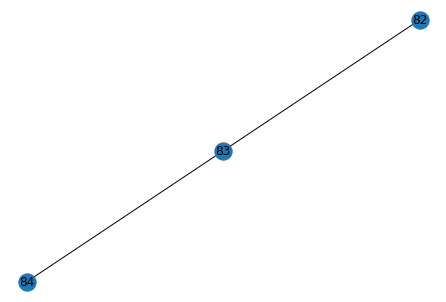

match_branches = [[82, 83]]
edges_to_delete (resolve crossover) = [[82, 84], [83, 84]]
edges_to_create (resolve crossover) = [[82, 83]]
Rejecting creating edge [82, 83] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([82, 83]), array([82, 84]), array([83, 84])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {128, 130, 13, 145, 146, 147, 153, 155, 157, 163, 164, 165, 178, 68, 69, 73, 79, 83, 97, 102, 108, 109, 111, 119, 125}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 70, 71, 72, 74, 75, 76, 77, 78, 80, 81, 82, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95.0, 96, 98.0, 99, 100.0, 101, 103, 104, 105, 106, 107, 110, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 126, 127, 129, 131, 132, 133

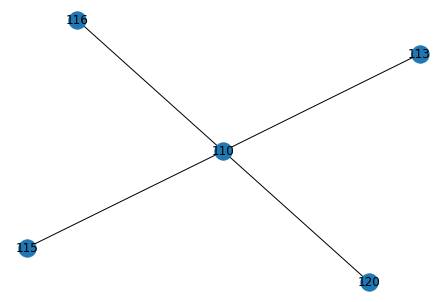

match_branches = [[115, 120], [110, 113]]
edges_to_delete (resolve crossover) = [[110, 115], [110, 116], [110, 120], [113, 115], [113, 116], [113, 120], [115, 116], [116, 120]]
edges_to_create (resolve crossover) = [[115, 120], [110, 113]]
curr_limb.deleted_edges 5 =[array([82, 83]), array([82, 84]), array([83, 84])]
Skipping endnode 30 because skeletal distance was 250.20199034759935 and threshold was 2500
skip_nodes = [30]
edges_to_delete (cut_limb_network) = [[110, 115], [110, 116], [110, 120], [113, 115], [113, 116], [113, 120], [115, 116], [116, 120]]
edges_to_create = [[115, 120], [110, 113]]
Number of connected components = 7
Comp 0 = {128, 130, 13, 145, 146, 147, 153, 155, 157, 163, 164, 165, 178, 68, 69, 73, 79, 83, 97, 102, 108, 109, 111, 119, 125}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,

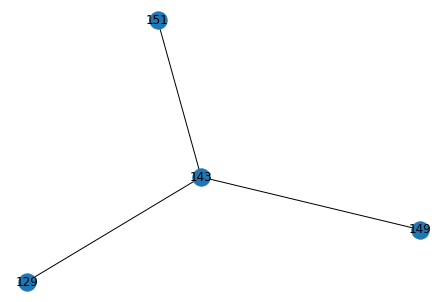

match_branches = []
edges_to_delete (resolve crossover) = [[129, 143], [129, 149], [129, 151], [143, 149], [143, 151], [149, 151]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[array([82, 83]), array([82, 84]), array([83, 84]), [110, 115], [110, 116], [110, 120], [113, 115], [113, 116], [113, 120], [115, 116], [116, 120]]
Skipping endnode 30 because skeletal distance was 250.20199034759935 and threshold was 2500
skip_nodes = [30]
edges_to_delete (cut_limb_network) = [[129, 143], [129, 149], [129, 151], [143, 149], [143, 151], [149, 151]]
edges_to_create = []
Number of connected components = 10
Comp 0 = {128, 130, 13, 145, 146, 147, 153, 155, 157, 163, 164, 165, 178, 68, 69, 73, 79, 83, 97, 102, 108, 109, 111, 119, 125}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 

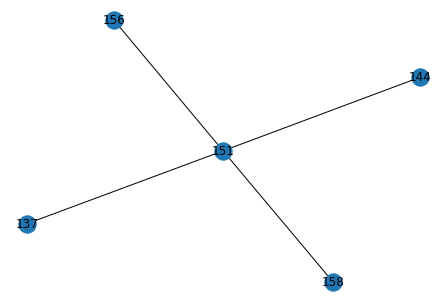

match_branches = [[137, 158], [151, 156]]
edges_to_delete (resolve crossover) = [[137, 144], [137, 151], [137, 156], [144, 151], [144, 156], [144, 158], [151, 158], [156, 158]]
edges_to_create (resolve crossover) = [[137, 158], [151, 156]]
curr_limb.deleted_edges 5 =[array([82, 83]), array([82, 84]), array([83, 84]), [110, 115], [110, 116], [110, 120], [113, 115], [113, 116], [113, 120], [115, 116], [116, 120], [129, 143], [129, 149], [129, 151], [143, 149], [143, 151], [149, 151]]
Skipping endnode 30 because skeletal distance was 250.20199034759935 and threshold was 2500
skip_nodes = [30]
edges_to_delete (cut_limb_network) = [[137, 144], [137, 151], [137, 156], [144, 151], [144, 156], [144, 158], [151, 158], [156, 158]]
edges_to_create = [[137, 158], [151, 156]]
Number of connected components = 12
Comp 0 = {128, 130, 13, 145, 146, 147, 153, 155, 157, 163, 164, 165, 178, 68, 69, 73, 79, 83, 97, 102, 108, 109, 111, 119, 125}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16

In [11]:
start_time = time.time()
if not test_mode:
    time.sleep(random.randint(0, 800))
print('Populate Started')
if not test_mode:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
else:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
print('Populate Done')

print(f"Total time for NeuronSplitSuggestions populate = {time.time() - start_time}")